# 기본세팅

In [2]:
### 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [5]:
import pandas as pd
import seaborn as sns

# 데이터 분석

## DDA

### 공공데이터포털

In [6]:
# 수요 확인용 데이터: from https://www.data.go.kr/data/15116280/fileDa"ta.do
df_treatment_benefit_use = pd.read_csv('../New_csv/요양보호/국민건강보험공단_노인장기요양보험 재가급여 종류별 이용 현황_20230703.csv', encoding='cp949')
df_treatment_benefit_use

시군구 이용급여 유형      연령  1등급  2등급  3등급  4등급  5등급  인지지원등급
0        서울특별시 종로구    방문요양  65-69세    3   10   17   22    1       0
1        서울특별시 종로구    방문요양  70-74세    4   10   19   40    5       0
2        서울특별시 종로구    방문요양  75-79세    7   19   52   80    9       0
3        서울특별시 종로구    방문요양  80-84세   29   34   93  165    9       0
4        서울특별시 종로구    방문요양  85-89세   18   29  110  125   17       0
...            ...     ...     ...  ...  ...  ...  ...  ...     ...
8745  제주특별자치도 서귀포시    단기보호  75-79세    0    0    0    0    0       0
8746  제주특별자치도 서귀포시    단기보호  80-84세    0    0    0    0    0       0
8747  제주특별자치도 서귀포시    단기보호  85-89세    0    0    0    0    0       0
8748  제주특별자치도 서귀포시    단기보호  90-94세    0    0    0    0    0       0
8749  제주특별자치도 서귀포시    단기보호   95세이상    0    0    0    0    0       0

[8750 rows x 9 columns]


|	columns	|	contents	|	key	|	opinion	|
|--|--|--|--|
|	시군구	|	수급자 지역	|		|	시/군/구 별로 분리 필요	|
|	이용급여 유형	|	이용급여 유형	|	방문요양, 방문목욕, 방문간호, 주야간보호, 단기보호	|		|
|	연령	|	65세~94세(5세 단위), 95세 이상	|		|		|
|	1등급	|	심신의 기능상태 장애로 일상생활에서 전적으로 다른 사람의 도움이 필요한 사람으로 장기요양인정 점수가 95점 이상인 사람	|		|		|
|	2등급	|	심신의 기능상태 장애로 일상생활에서 상당부분 다른사람의 도움이 필요한 사람으로 장기요양인정 점수가 75점 이상 95점 미만인 사람	|		|		|
|	3등급	|	심신의 기능상태 장애로 일상생활에서 부분적으로 다른 사람의 도움이 필요한 사람으로 장기요양인정 점수가 60점 이상 75점 미만인 사람	|		|		|
|	4등급	|	심신의 기능상태 장애로 일상생활에서 일정부분 다른 사람의 도움이 필요한 사람으로 장기요양인정 점수가 51점 이상 60점 미만인 사람	|		|		|
|	5등급	|	치매(제2조에 따른 노인성 질병에 해당하는 치매로 한정함) 환자로 장기요양인정 점수가 45점 이상 51점 미만인 사람	|		|		|
|	인지지원등급	|	치매환자로서(노인장기요양보험법 시행령 제2조에 따른 노인성 질병으로 한정)장기요양인정점수가 45점 미만인 자	|		|		|


- 65세 이상 노인 및 노인성 질병을 가진 65세 미만 국민으로 장기요양 1~5등급 또는 인지지원등급을 받은 사람을 대상으로 하며, 노인성 질병은 치매, 뇌혈관질환, 파킨슨병 및 관련 질환이 있다.
- 선정기준은 소득수준과 상관 없이 노인장기요양보험 가입자(국민건강보험 가입자와 동일)와 그 피부양자, 의료급여 수급권자로 65세 이상 노인과 64세 이하 노인성 질병이 있는 사람이면 신청 가능하다.
- 재가급여본인부담금은 장기요양 급여 비용의 15%이다.
  
- from: https://blog.naver.com/ys-9973133/223185760837

In [7]:
df_treatment_benefit_use['시도'] = df_treatment_benefit_use['시군구'].str.split(' ', expand=True)[0]
df_treatment_benefit_use['구시군'] = df_treatment_benefit_use['시군구'].str.split(' ', expand=True)[1]
df_treatment_benefit_use['구'] = df_treatment_benefit_use['시군구'].str.split(' ', expand=True)[2]

In [8]:
df_treatment_benefit_use = df_treatment_benefit_use[['시도', '구시군', '구', '이용급여 유형', '연령', '1등급', '2등급', '3등급', '4등급', '5등급', '인지지원등급']]

In [9]:
df_tb_with_count = df_treatment_benefit_use.melt(id_vars=["시도", "구시군", "구", "이용급여 유형", "연령"], 
                    value_vars=["1등급", "2등급", "3등급", "4등급", "5등급", "인지지원등급"],
                    var_name="등급", 
                    value_name="명")

# 0 이상의 '횟수'를 가진 행만 필터링합니다.
df_filtered = df_tb_with_count[df_tb_with_count["명"] > 0]

# 각 행을 '횟수' 열에 해당하는 값만큼 반복하여 새로운 데이터프레임을 생성합니다.
df_repeated = df_filtered.loc[df_filtered.index.repeat(df_filtered["명"])].reset_index(drop=True)

# '횟수' 열을 제거합니다.
df_treatment_benefit_use = df_repeated.drop(columns=["명"])

df_treatment_benefit_use

시도   구시군     구 이용급여 유형      연령      등급
0         서울특별시   종로구  None    방문요양  65-69세     1등급
1         서울특별시   종로구  None    방문요양  65-69세     1등급
2         서울특별시   종로구  None    방문요양  65-69세     1등급
3         서울특별시   종로구  None    방문요양  70-74세     1등급
4         서울특별시   종로구  None    방문요양  70-74세     1등급
...         ...   ...   ...     ...     ...     ...
827673  제주특별자치도  서귀포시  None   주야간보호  85-89세  인지지원등급
827674  제주특별자치도  서귀포시  None   주야간보호  85-89세  인지지원등급
827675  제주특별자치도  서귀포시  None   주야간보호  85-89세  인지지원등급
827676  제주특별자치도  서귀포시  None   주야간보호  85-89세  인지지원등급
827677  제주특별자치도  서귀포시  None   주야간보호  90-94세  인지지원등급

[827678 rows x 6 columns]

In [10]:
df_tb_with_count

시도   구시군     구 이용급여 유형      연령      등급   명
0        서울특별시   종로구  None    방문요양  65-69세     1등급   3
1        서울특별시   종로구  None    방문요양  70-74세     1등급   4
2        서울특별시   종로구  None    방문요양  75-79세     1등급   7
3        서울특별시   종로구  None    방문요양  80-84세     1등급  29
4        서울특별시   종로구  None    방문요양  85-89세     1등급  18
...        ...   ...   ...     ...     ...     ...  ..
52495  제주특별자치도  서귀포시  None    단기보호  75-79세  인지지원등급   0
52496  제주특별자치도  서귀포시  None    단기보호  80-84세  인지지원등급   0
52497  제주특별자치도  서귀포시  None    단기보호  85-89세  인지지원등급   0
52498  제주특별자치도  서귀포시  None    단기보호  90-94세  인지지원등급   0
52499  제주특별자치도  서귀포시  None    단기보호   95세이상  인지지원등급   0

[52500 rows x 7 columns]

### 필요할 수도 있는 데이터 from [보건복지부](https://www.mohw.go.kr/board.es?mid=a10503010100&bid=0027&act=view&list_no=1478747&tag=&nPage=2)

In [11]:
df_available_grade_2024 = pd.DataFrame(columns=['등급', '월한도액'],
            data=[['1등급', 2069900],
                 ['2등급', 1869600],
                 ['3등급', 1455800],
                 ['4등급', 1341800],
                 ['5등급', 1151600],
                 ['인지지원등급', 643700]])
df_available_grade_2024

등급     월한도액
0     1등급  2069900
1     2등급  1869600
2     3등급  1455800
3     4등급  1341800
4     5등급  1151600
5  인지지원등급   643700

In [12]:
# 공동생활가정의 2024 급여유형별 장기요양수가
df_treatment_pay_oneday =  pd.DataFrame(columns=['등급', '수가',  '본인부담액'],
            data=[['1등급', 71010, 14202],
                 ['2등급', 65890, 13178],
                 ['3등급', 60740, 12148],
                 ['4등급', 60740, 12148],
                 ['5등급', 60740, 12148]])
df_treatment_pay_oneday

등급     수가  본인부담액
0  1등급  71010  14202
1  2등급  65890  13178
2  3등급  60740  12148
3  4등급  60740  12148
4  5등급  60740  12148

In [13]:
# 방문요양 시간당 수가
df_treatment_pay_minutes =  pd.DataFrame(columns=['방문당_시간(분)', '수가',  '본인부담액'],
            data=[[30, 16630, 2495],
                 [60, 24120, 3618],
                 [90, 32510, 4877],
                 [120, 41380, 6207],
                 [150, 48250, 7238],
                 [180, 54320, 8148],
                 [210, 60530, 9080],
                 [240, 66770, 10016]])
df_treatment_pay_minutes

방문당_시간(분)     수가  본인부담액
0         30  16630   2495
1         60  24120   3618
2         90  32510   4877
3        120  41380   6207
4        150  48250   7238
5        180  54320   8148
6        210  60530   9080
7        240  66770  10016

In [14]:
# 방문목욕 시간당 수가
df_bathservice_pay =  pd.DataFrame(columns=['차량이용여부', '수가',  '본인부담액'],
            data=[['차량이용(차량 내)', 84670, 12701],
                 ['차량이용(가정 내)', 76340, 11451],
                 ['차량 미 이용', 47670, 7151]])
df_bathservice_pay

차량이용여부     수가  본인부담액
0  차량이용(차량 내)  84670  12701
1  차량이용(가정 내)  76340  11451
2     차량 미 이용  47670   7151

In [15]:
# 방문간호 시간당 수가
df_nursing_pay =  pd.DataFrame(columns=[['방문당_시간(분)', '수가',  '본인부담액']],
            data=[['15~30', 40760, 6114],
                 ['30~60', 51110, 7667],
                 ['60~', 61490, 9224]])
df_nursing_pay

방문당_시간(분)     수가 본인부담액
0     15~30  40760  6114
1     30~60  51110  7667
2       60~  61490  9224

### [KOSIS](https://kosis.kr/statHtml/statHtml.do?orgId=117&tblId=DT_117104_A001&conn_path=I3)
-  KOSIS( 복지 / 노인장기요양보험통계 )
-  KOSIS( 복지 / 장기요양실태조사)

# 분석

## 수익 예측

### 급여실적 - 방문요양을 가장 많이 이용하며 본인부담액이 가장 큼

In [16]:
df_details = pd.read_csv('../New_csv/요양보호/연령별_자격별_급여종류별_장기요양_급여실적_20240513144224.csv')
df_details[:5]

연령별(1)  성별(1)           항목       2022     2022.1   2022.2  2022.3  \
0  연령별(1)  성별(1)           항목          계          계        계       계   
1  연령별(1)  성별(1)           항목          계       방문요양     방문목욕    방문간호   
2       계      계  급여이용수급자 (명)     999451     598641   115687   19928   
3       계      계   급여제공기관 (개)      26266      14959     4302     588   
4       계      계   급여제공일수 (일)  215782169  111198522  2829014  726037   

     2022.4  2022.5  2022.6  ...   2022.40   2022.41 2022.42 2022.43  2022.44  \
0         계       계       계  ...        기초        기초      기초      기초       기초   
1     주야간보호    단기보호    복지용구  ...         계      방문요양    방문목욕    방문간호    주야간보호   
2    183056    2061  498759  ...    160375    100993   18761    3352    16965   
3      5213      86    1633  ...     23773     12958    2368     470     4640   
4  32307570  125927       0  ...  36395295  19617019  460862  112585  2874790   

  2022.45 2022.46   2022.47     2022.48  2022.49  
0      기초      기초        기초          기초       기초  
1    단기보호    복지용구    노인요양시설  노인요양공동생활가정  통합재가서비스  
2     256   86605     42994        4274        0  
3      62    1519      4432        1687        0  
4   12779       0  12246557     1070703        0  

[5 rows x 53 columns]

In [17]:
df_details.columns = df_details.loc[0]+df_details.loc[1]

In [18]:
df_details.columns

Index(['연령별(1)연령별(1)', '성별(1)성별(1)', '항목항목', '계계', '계방문요양', '계방문목욕', '계방문간호',
       '계주야간보호', '계단기보호', '계복지용구', '계노인요양시설', '계노인요양공동생활가정', '계통합재가서비스', '일반계',
       '일반방문요양', '일반방문목욕', '일반방문간호', '일반주야간보호', '일반단기보호', '일반복지용구', '일반노인요양시설',
       '일반노인요양공동생활가정', '일반통합재가서비스', '감경계', '감경방문요양', '감경방문목욕', '감경방문간호',
       '감경주야간보호', '감경단기보호', '감경복지용구', '감경노인요양시설', '감경노인요양공동생활가정', '감경통합재가서비스',
       '의료급여계', '의료급여방문요양', '의료급여방문목욕', '의료급여방문간호', '의료급여주야간보호', '의료급여단기보호',
       '의료급여복지용구', '의료급여노인요양시설', '의료급여노인요양공동생활가정', '의료급여통합재가서비스', '기초계',
       '기초방문요양', '기초방문목욕', '기초방문간호', '기초주야간보호', '기초단기보호', '기초복지용구', '기초노인요양시설',
       '기초노인요양공동생활가정', '기초통합재가서비스'],
      dtype='object')

In [19]:
df_details_all = df_details[['연령별(1)연령별(1)', '성별(1)성별(1)', '항목항목', '계계', '계방문요양', '계방문목욕', '계방문간호',
       '계주야간보호', '계단기보호', '계복지용구', '계노인요양시설', '계노인요양공동생활가정', '계통합재가서비스']]

In [20]:
df_details_all_extract = df_details_all.loc[df_details_all['연령별(1)연령별(1)']=='70 ~ 74세'].loc[df_details_all['성별(1)성별(1)']=='남자'].T

In [21]:
df_details_all_extract.columns = df_details_all_extract.loc['항목항목']

In [22]:
df_details_all_extract = df_details_all_extract.loc['계계':]

In [23]:
df_details_all_extract['본인부담금 (천원)'] =df_details_all_extract['급여비용 (천원)'].astype(float)- df_details_all_extract['공단부담금 (천원)'].astype(float)

In [24]:
df_details_all_extract.sort_values('본인부담금 (천원)', ascending=False)

항목항목        급여이용수급자 (명) 급여제공기관 (개) 급여제공일수 (일)  급여비용 (천원) 공단부담금 (천원)  \
계계                37415      17219    8237782  418708085  384549237   
계방문요양             24964      10085    5488611  223543602  205500857   
계노인요양시설            6277       2945    1667114  116399931  106760780   
계주야간보호             5108       3029     829986   50124380   45990041   
계복지용구             19739       1411          0   11982430   10966215   
계방문목욕              3923       1811     106110    7254417    6654151   
계노인요양공동생활가정         455        396     105004    7191913    6671950   
계방문간호               897        355      36463    1931163    1749688   
계단기보호                61         33       2796     157132     142818   
계통합재가서비스             19         14       1698     123116     112737   

항목항목         본인부담금 (천원)  
계계           34158848.0  
계방문요양        18042745.0  
계노인요양시설       9639151.0  
계주야간보호        4134339.0  
계복지용구         1016215.0  
계방문목욕          600266.0  
계노인요양공동생활가정    519963.0  
계방문간호          181475.0  
계단기보호           14314.0  
계통합재가서비스        10379.0

### 서울시 70-74세의 총한도액 - 국가에서 지급하는 형태의 수익

In [25]:
df_tb_with_count.loc[df_tb_with_count['연령'] == '70-74세'].sort_values('명', ascending=False)[:5]

시도   구시군     구 이용급여 유형      연령   등급    명
29226    경기도   부천시  None    방문요양  70-74세  4등급  436
28106  인천광역시   남동구  None    방문요양  70-74세  4등급  409
26776  서울특별시   강서구  None    방문요양  70-74세  4등급  373
28141  인천광역시   부평구  None    방문요양  70-74세  4등급  356
29611    경기도  남양주시  None    방문요양  70-74세  4등급  354

In [26]:
df_tb_with_count.loc[df_tb_with_count['연령'] == '70-74세'][['시도', '명']].groupby('시도').sum().sort_values('명', ascending=False)

명
시도            
경기도      14478
서울특별시    10247
경상남도      6736
부산광역시     6282
경상북도      5809
전라북도      4615
인천광역시     4578
전라남도      4256
충청남도      3853
대구광역시     3641
광주광역시     2661
충청북도      2245
강원도       2216
대전광역시     2022
울산광역시     1555
제주특별자치도    554
세종특별자치시    301

In [27]:
df_tb_with_count.loc[df_tb_with_count['연령'] == '70-74세'][['등급', '명']].groupby('등급').sum().sort_values('명', ascending=False)

명
등급           
4등급     38475
3등급     20963
5등급      8241
2등급      5083
1등급      2691
인지지원등급    596

In [28]:
pivot = pd.pivot_table(data=df_tb_with_count.loc[df_tb_with_count['연령'] == '70-74세'],
               index=['시도', '등급'],
              values='명',
               columns=['연령'],
              aggfunc=sum)

/tmp/ipykernel_34/2646929925.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(data=df_tb_with_count.loc[df_tb_with_count['연령'] == '70-74세'],


In [29]:
pivot

연령           70-74세
시도   등급            
강원도  1등급         98
     2등급        222
     3등급        748
     4등급        977
     5등급        155
...             ...
충청북도 2등급        164
     3등급        588
     4등급       1103
     5등급        286
     인지지원등급      30

[102 rows x 1 columns]

In [30]:
df_merge = pd.merge(df_tb_with_count, df_available_grade_2024, on='등급', how='left')

In [31]:
df_merge['총한도액'] = df_merge.apply(lambda x: x['명'] * x['월한도액'], axis=1)

In [32]:
df_merge

시도   구시군     구 이용급여 유형      연령      등급   명     월한도액      총한도액
0        서울특별시   종로구  None    방문요양  65-69세     1등급   3  2069900   6209700
1        서울특별시   종로구  None    방문요양  70-74세     1등급   4  2069900   8279600
2        서울특별시   종로구  None    방문요양  75-79세     1등급   7  2069900  14489300
3        서울특별시   종로구  None    방문요양  80-84세     1등급  29  2069900  60027100
4        서울특별시   종로구  None    방문요양  85-89세     1등급  18  2069900  37258200
...        ...   ...   ...     ...     ...     ...  ..      ...       ...
52495  제주특별자치도  서귀포시  None    단기보호  75-79세  인지지원등급   0   643700         0
52496  제주특별자치도  서귀포시  None    단기보호  80-84세  인지지원등급   0   643700         0
52497  제주특별자치도  서귀포시  None    단기보호  85-89세  인지지원등급   0   643700         0
52498  제주특별자치도  서귀포시  None    단기보호  90-94세  인지지원등급   0   643700         0
52499  제주특별자치도  서귀포시  None    단기보호   95세이상  인지지원등급   0   643700         0

[52500 rows x 9 columns]

In [33]:
# 서울시/70-74세의 월 가용액(우리 사이트에서 소비 가능액)
df_merge.loc[df_merge['연령'] == '70-74세'].sort_values('총한도액', ascending=False).loc[df_merge['시도']=='서울특별시']['총한도액'].sum()

14769513800

In [34]:
# 서울시/70-74세의 수
df_merge.loc[df_merge['연령'] == '70-74세'].sort_values('총한도액', ascending=False).loc[df_merge['시도']=='서울특별시']['명'].sum()

10247

### 70-74세의 본인부담금 질환자에게서 발생하는 수익
- 1,643,422,000 <= 월 할당액 이외로 수익화할 수 있는 금액 범위 < 3,286,843,000
- 414,556,800 <= 월 할당액 이외로 수익화할 수 있는 금액 범위 < 829,113,600
- 서울 거주 70-74세 전체(9378269) 남성 인구수 (4532115) -> 인구비 0.48
- 전체인구수(51,285,153), 신경계통질환자수 142993 비율 0.0028
- 신경계통질환자 중 간병비 지원을 받는 사람의 비율 0.15
- -> 결과
- 331313 <= 월 할당액 이외로 수익화할 수 있는 금액 범위 < 662,627
- 83,574 <= 월 할당액 이외로 수익화할 수 있는 금액 범위 < 829,113,600

In [35]:
df_own_pay = pd.read_csv('../New_csv/요양보호/_재가급여_이용자__월평균_본인부담금_20240510150323.csv')
df_own_pay[:5]

특성별(1)  특성별(2)      2019      2019.1      2019.2         2019.3  \
0  특성별(1)  특성별(2)  응답자수 (명)  없음(0원) (%)  5만원 미만 (%)  5~10만원 미만 (%)   
1      전체      소계    384416        20.1         5.4           21.5   
2      성별      남성    106340        20.6         7.5           21.4   
3      성별      여성    278075          20         4.6           21.6   
4     연령별  65세 미만     12650        37.8         8.8             25   

           2019.4       2019.5       2019.6      2022      2022.1      2022.2  \
0  10~20만원 미만 (%)  20만원 이상 (%)  월평균 금액 (만원)  응답자수 (명)  없음(0원) (%)  5만원 미만 (%)   
1            39.3         13.6         11.1    643686        16.6         6.1   
2            37.5           13         10.9    175488        15.7         7.7   
3              40         13.9         11.2    468198          17         5.5   
4            21.7          6.6          7.3     13336        29.2         1.2   

          2022.3          2022.4       2022.5       2022.6  
0  5~10만원 미만 (%)  10~20만원 미만 (%)  20만원 이상 (%)  월평균 금액 (만원)  
1           21.2              37           19         12.3  
2           21.4            37.7         17.5         12.1  
3           21.2            36.8         19.5         12.4  
4           30.9            23.8         14.9          9.9

In [36]:
df_own_pay.columns

Index(['특성별(1)', '특성별(2)', '2019', '2019.1', '2019.2', '2019.3', '2019.4',
       '2019.5', '2019.6', '2022', '2022.1', '2022.2', '2022.3', '2022.4',
       '2022.5', '2022.6'],
      dtype='object')

In [37]:
df_own_pay_2022 =df_own_pay[['특성별(1)', '특성별(2)', '2022', '2022.1', '2022.2', '2022.3', '2022.4',
       '2022.5', '2022.6']]

In [38]:
df_own_pay_2022.columns = df_own_pay_2022.loc[0]

In [39]:
df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']

0 특성별(1)  특성별(2) 응답자수 (명) 없음(0원) (%) 5만원 미만 (%) 5~10만원 미만 (%) 10~20만원 미만 (%)  \
6    연령별  70~74세    49352       30.5        6.9          16.8           33.3   

0 20만원 이상 (%) 월평균 금액 (만원)  
6        12.6          10

In [40]:
df_own_pay_70s = pd.DataFrame()

In [41]:
df_own_pay_70s['응답자수'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['응답자수 (명)'].astype(int)
df_own_pay_70s['없음'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['없음(0원) (%)'].astype(float)*df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['응답자수 (명)'].astype(int)*0.01
df_own_pay_70s['5만원미만'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['5만원 미만 (%)'].astype(float)*df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['응답자수 (명)'].astype(int)*0.01
df_own_pay_70s['5이상10미만'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['5~10만원 미만 (%)'].astype(float)*df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['응답자수 (명)'].astype(int)*0.01
df_own_pay_70s['10이상20미만'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['10~20만원 미만 (%)'].astype(float)*df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['응답자수 (명)'].astype(int)*0.01
df_own_pay_70s['20이상'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['20만원 이상 (%)'].astype(float)*df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['응답자수 (명)'].astype(int)*0.01
df_own_pay_70s['평균액'] = df_own_pay_2022.loc[df_own_pay_2022['특성별(2)']=='70~74세']['월평균 금액 (만원)']

In [42]:
df_own_pay_70s = df_own_pay_70s.T

In [43]:
df_own_pay_70s = df_own_pay_70s.astype(float)

In [44]:
df_own_pay_70s.sort_values(6, ascending=False)

6
응답자수      49352.000
10이상20미만  16434.216
없음        15052.360
5이상10미만    8291.136
20이상       6218.352
5만원미만      3405.288
평균액          10.000

In [45]:
# 1,643,422,000
df_own_pay_70s.loc['10이상20미만']*100000

6    1.643422e+09
Name: 10이상20미만, dtype: float64

In [46]:
# 3,286,843,000
df_own_pay_70s.loc['10이상20미만']*200000

6    3.286843e+09
Name: 10이상20미만, dtype: float64

In [47]:
# 414,556,800
df_own_pay_70s.loc['5이상10미만']*50000

6    414556800.0
Name: 5이상10미만, dtype: float64

In [48]:
# 829,113,600
df_own_pay_70s.loc['5이상10미만']*100000

6    829113600.0
Name: 5이상10미만, dtype: float64

## 이용자의 니즈

In [49]:
df_difficulties = pd.read_csv('../New_csv/요양보호/_재가급여_이용자__재가_생활에서_가장_어려운_점_20240510150350.csv')
df_difficulties[:5]

특성별(1)  특성별(2)      2022    2022.1  2022.2     2022.3         2022.4  \
0  특성별(1)  특성별(2)  응답자수 (명)  식사준비 (%)  식사 (%)  가사 활동 (%)  세안 화장실 이용 (%)   
1      전체      소계    603129      18.8     5.4        7.8            5.7   
2      성별      남성    168310      14.3     3.9        5.9            7.5   
3      성별      여성    434819      20.5       6        8.5              5   
4     연령별  65세 미만     11945      10.3     3.8        3.9              3   

   2022.5  2022.6  2022.7        2022.8  2022.9    2022.10  
0  목욕 (%)  외출 (%)  통증 (%)  심리 정서적문제 (%)  기타 (%)  어려움없음 (%)  
1       6    12.3     9.8          14.1     1.5       18.5  
2     7.4    14.3       9          17.1     1.7       18.8  
3     5.5    11.5    10.2            13     1.5       18.4  
4    15.5    20.1    11.8          10.5     3.9       17.3

In [50]:
df_difficulties.columns = df_difficulties.loc[0]
df_difficulties = df_difficulties[1:]

In [51]:
df_difficulties.columns

Index(['특성별(1)', '특성별(2)', '응답자수 (명)', '식사준비 (%)', '식사 (%)', '가사 활동 (%)',
       '세안 화장실 이용 (%)', '목욕 (%)', '외출 (%)', '통증 (%)', '심리 정서적문제 (%)', '기타 (%)',
       '어려움없음 (%)'],
      dtype='object', name=0)

In [52]:
df_difficulties['응답자수 (명)'] = df_difficulties['응답자수 (명)'].astype(int)
df_difficulties['식사준비 (%)'] = df_difficulties['식사준비 (%)'].astype(float)
df_difficulties['식사 (%)'] = df_difficulties['식사 (%)'].astype(float)
df_difficulties['가사 활동 (%)'] = df_difficulties['가사 활동 (%)'].astype(float)
df_difficulties['세안 화장실 이용 (%)'] = df_difficulties['세안 화장실 이용 (%)'].astype(float)
df_difficulties['목욕 (%)'] = df_difficulties['목욕 (%)'].astype(float)
df_difficulties['외출 (%)'] = df_difficulties['외출 (%)'].astype(float)
df_difficulties['통증 (%)'] = df_difficulties['통증 (%)'].astype(float)
df_difficulties['심리 정서적문제 (%)'] = df_difficulties['심리 정서적문제 (%)'].astype(float)
df_difficulties['기타 (%)'] = df_difficulties['기타 (%)'].astype(float)
df_difficulties['어려움없음 (%)'] = df_difficulties['어려움없음 (%)'].astype(float)

In [245]:
df_difficulties[:10]

0  특성별(1)  특성별(2)  응답자수 (명)  식사준비 (%)  식사 (%)  가사 활동 (%)  세안 화장실 이용 (%)  \
1      전체      소계    603129      18.8     5.4        7.8            5.7   
2      성별      남성    168310      14.3     3.9        5.9            7.5   
3      성별      여성    434819      20.5     6.0        8.5            5.0   
4     연령별  65세 미만     11945      10.3     3.8        3.9            3.0   
5     연령별  65~69세     29561      19.4     4.4       11.4            3.1   
6     연령별  70~74세     46963      23.2     3.5        8.1            2.8   
7     연령별  75~79세     87036      18.3     5.2        6.6            7.5   
8     연령별  80~84세    167456      20.7     4.8        9.0            4.9   
9     연령별  85~89세    162812      16.7     6.9        7.9            6.7   
10    연령별  90세 이상     97357      18.0     5.3        6.0            6.6   

0   목욕 (%)  외출 (%)  통증 (%)  심리 정서적문제 (%)  기타 (%)  어려움없음 (%)  
1      6.0    12.3     9.8          14.1     1.5       18.5  
2      7.4    14.3     9.0          17.1     1.7       18.8  
3      5.5    11.5    10.2          13.0     1.5       18.4  
4     15.5    20.1    11.8          10.5     3.9       17.3  
5      5.9    11.9    10.6          16.1     4.0       13.2  
6      6.4    14.6    10.7          10.6     1.5       18.6  
7      8.3    14.8    13.4          10.9     0.5       14.6  
8      4.3    12.3     8.0          16.1     2.8       17.1  
9      5.4     9.3     9.8          13.7     0.5       23.1  
10     6.8    12.9     8.8          15.9     1.1       18.6

In [54]:
# 전체의 어려움 - 식사준비/어려움없음/심리정서적문제/외출/통증
df_difficulties.loc[df_difficulties['특성별(1)']=='전체'].T.iloc[3:].sort_values(1, ascending=False)

1
0                  
식사준비 (%)       18.8
어려움없음 (%)      18.5
심리 정서적문제 (%)   14.1
외출 (%)         12.3
통증 (%)          9.8
가사 활동 (%)       7.8
목욕 (%)          6.0
세안 화장실 이용 (%)   5.7
식사 (%)          5.4
기타 (%)          1.5

In [55]:
# 70-74의 어려움 - 식사준비/어려움없음/외출/통증/심리정서적문제
df_difficulties_70s = df_difficulties.loc[df_difficulties['특성별(2)']=='70~74세'].T.iloc[3:].sort_values(6, ascending=False).reset_index()

In [56]:
df_difficulties_70s

0     6
0       식사준비 (%)  23.2
1      어려움없음 (%)  18.6
2         외출 (%)  14.6
3         통증 (%)  10.7
4   심리 정서적문제 (%)  10.6
5      가사 활동 (%)   8.1
6         목욕 (%)   6.4
7         식사 (%)   3.5
8  세안 화장실 이용 (%)   2.8
9         기타 (%)   1.5

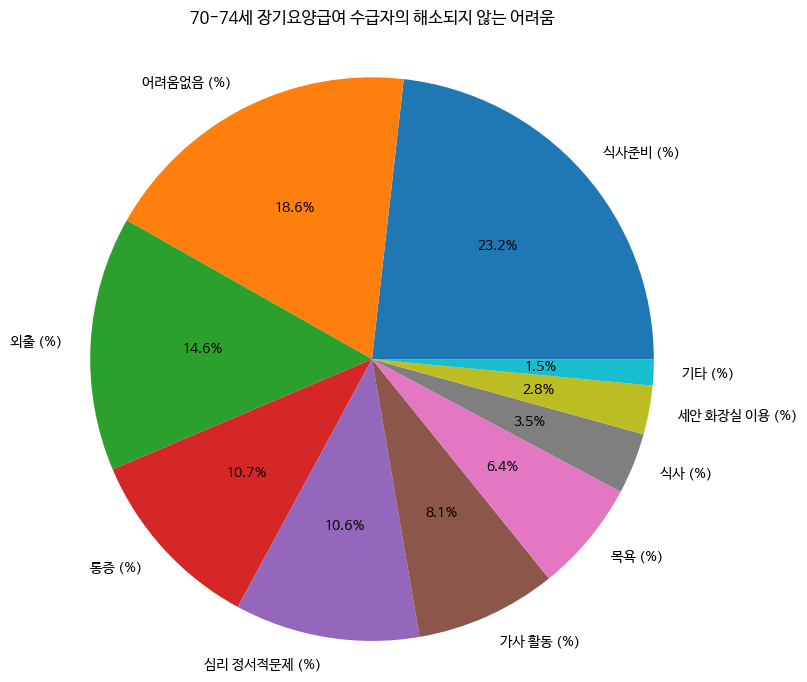

In [57]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_difficulties_70s[6], labels=df_difficulties_70s[0], autopct='%1.1f%%')
plt.axis('equal')
plt.title('70-74세 장기요양급여 수급자의 해소되지 않는 어려움\n')
plt.show()

1) 돌봄 서비스 범위

- 신체활동 지원 : 식사보조, 투약보조, 개인위생활동보조, 체위변경, 배설보조, 이동보조

- 정서지원 : 말벗, 의사소통 보조


2) 돌봄 서비스 제외 범위

- 돌봄 대상자의 가족을 위한 지원 : 돌봄 대상자의 가족을 위한 식사준비, 빨래, 장보기, 청소 등

- 돌봄 대상자 또는 그 가족의 생업 지원 : 가게보기, 부업에 참여하기, 배달하기, 가게 청소 등

- 돌봄 대상자의 일상생활과 관련이 없는 지원 : 안마, 잔디 깎기, 텃밭 매기 등
[출처] 간병인 식사를 챙겨야 할까? 간병인 고용하기 전 알아야 할 상황별 Q&A 정리|작성자 토닥씨

### 수급자 이용 시간대 및 이용일수

#### 수급자 이용 시간대

In [59]:
df_using_time = pd.read_csv('../New_csv/요양보호/_재가급여_이용자__지난_1개월간_장기요양급여_1일_평균_이용시간_중복이용_포함__20240510150259-checkpoint.csv')
df_using_time[:2]

특성별(1)  특성별(2)      2019      2019.1        2019.2        2019.3  \
0  특성별(1)  특성별(2)  응답자수 (명)  2시간 미만 (%)  2~3시간 미만 (%)  3~5시간 미만 (%)   
1      전체      소계    383360          12           9.6            57   

       2019.4      2022      2022.1        2022.2        2022.3      2022.4  
0  5시간 이상 (%)  응답자수 (명)  2시간 미만 (%)  2~3시간 미만 (%)  3~5시간 미만 (%)  5시간 이상 (%)  
1        21.4    640655        16.3             8          52.3        23.5

In [60]:
df_using_time.columns

Index(['특성별(1)', '특성별(2)', '2019', '2019.1', '2019.2', '2019.3', '2019.4',
       '2022', '2022.1', '2022.2', '2022.3', '2022.4'],
      dtype='object')

In [61]:
df_using_time = df_using_time[['특성별(1)', '특성별(2)', '2022', '2022.1', '2022.2', '2022.3', '2022.4']]

In [62]:
df_using_time.columns = df_using_time.loc[0]
df_using_time  = df_using_time.reset_index()
df_using_time = df_using_time[1:]

In [63]:
df_using_time_new = df_using_time[df_using_time['특성별(2)']=='70~74세'].T

In [64]:
df_using_time_new = df_using_time_new.reset_index()
df_using_time_new.columns = df_using_time_new.loc[0]

In [65]:
df_using_time_new =df_using_time_new[4:]

In [66]:
df_using_time_new

0         index     6
4    2시간 미만 (%)  21.8
5  2~3시간 미만 (%)   9.7
6  3~5시간 미만 (%)  52.7
7    5시간 이상 (%)  15.8

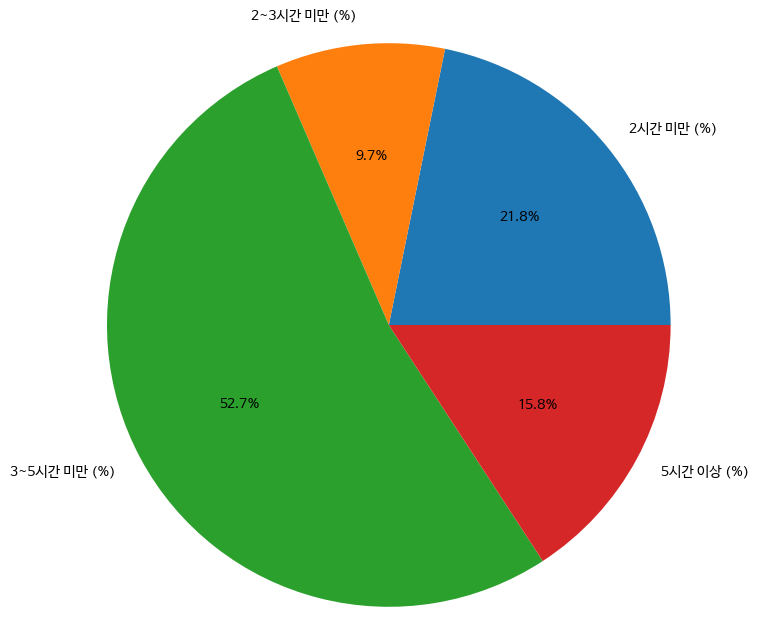

In [67]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_using_time_new[6], labels=df_using_time_new['index'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('')
plt.show()

#### 수급자 이용 일수

In [68]:
df_using_day = pd.read_csv('../New_csv/요양보호/_재가급여_이용자__지난_1개월간_장기요양급여_이용일수_중복이용_포함__20240510150229.csv')
df_using_day[:2]

특성별(1)  특성별(2)      2019     2019.1      2019.2      2019.3      2019.4  \
0  특성별(1)  특성별(2)  응답자수 (명)  9일 이하 (%)  10~19일 (%)  20~24일 (%)  25일 이상 (%)   
1      전체      소계    384416       15.7         7.1        49.5        27.7   

       2022     2022.1      2022.2      2022.3      2022.4  
0  응답자수 (명)  9일 이하 (%)  10~19일 (%)  20~24일 (%)  25일 이상 (%)  
1    640655       23.8           6        53.8        16.5

In [69]:
df_using_day = df_using_day[['특성별(1)', '특성별(2)', '2022', '2022.1', '2022.2', '2022.3', '2022.4']]
df_using_day.columns = df_using_day.loc[0]
df_using_day  = df_using_day.reset_index()
df_using_day = df_using_day[1:]

In [70]:
df_using_day_new = df_using_day[df_using_day['특성별(2)']=='70~74세'].T

In [71]:
df_using_day_new = df_using_day_new.reset_index()
df_using_day_new.columns = df_using_day_new.loc[0]

In [72]:
df_using_day_new = df_using_day_new[4:]

In [73]:
df_using_day_new

0       index     6
4   9일 이하 (%)  23.4
5  10~19일 (%)   6.5
6  20~24일 (%)  54.9
7  25일 이상 (%)  15.2

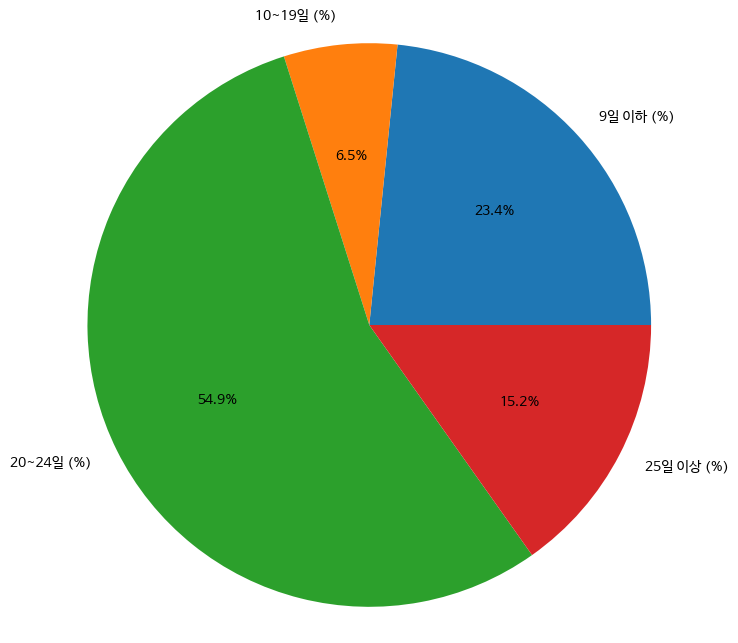

In [74]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_using_day_new[6], labels=df_using_day_new['index'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('')
plt.show()

### 수급자 보행이동능력
- 거동에 도움이 필요함.
  --> 병원 방문에 도움이 필요함=병원동행매니저양성 / 식사 준비에 도움이 필요함=식단배달서비스(집내부까지방문)

In [76]:
df_move = pd.read_csv('../New_csv/요양보호/_수급자__보행·이동능력_20240510150020.csv')
df_move[:5]

특성별(1)  특성별(2)      2019        2019.1             2019.2  \
0  특성별(1)  특성별(2)  응답자수 (명)  독립적 이동가능 (%)  기어서 보장구 착용 이동 (%)   
1      전체      소계    705547          21.3               10.7   
2      성별      남성    192121            24                8.2   
3      성별      여성    513426          20.2               11.6   
4     연령별  65세 미만     26133          16.3                6.8   

              2019.3      2019.4  2019.5      2022        2022.1  \
0  보조기구·타인 도움 필요 (%)  거동 불가능 (%)  기타 (%)  응답자수 (명)  독립적 이동가능 (%)   
1               49.9        17.9     0.2   1059394          17.6   
2               47.6        19.9     0.3    293215          20.6   
3               50.8        17.1     0.2    766179          16.4   
4               51.9          25       0     29954          18.8   

              2022.2             2022.3      2022.4  
0  기어서 보장구 착용 이동 (%)  보조기구·타인 도움 필요 (%)  거동 불가능 (%)  
1                7.8               58.1        16.6  
2                6.5               56.9        15.9  
3                8.3               58.5        16.8  
4                6.2               49.4        25.5

In [77]:
df_move.columns

Index(['특성별(1)', '특성별(2)', '2019', '2019.1', '2019.2', '2019.3', '2019.4',
       '2019.5', '2022', '2022.1', '2022.2', '2022.3', '2022.4'],
      dtype='object')

In [78]:
df_move = df_move[['특성별(1)', '특성별(2)', '2022', '2022.1', '2022.2', '2022.3', '2022.4']]
df_move.columns = df_move.loc[0]
df_move = df_move[1:]
df_move.columns

Index(['특성별(1)', '특성별(2)', '응답자수 (명)', '독립적 이동가능 (%)', '기어서 보장구 착용 이동 (%)',
       '보조기구·타인 도움 필요 (%)', '거동 불가능 (%)'],
      dtype='object', name=0)

In [79]:
df_move[['응답자수 (명)', '독립적 이동가능 (%)', '기어서 보장구 착용 이동 (%)',
       '보조기구·타인 도움 필요 (%)', '거동 불가능 (%)']] = df_move[['응답자수 (명)', '독립적 이동가능 (%)', '기어서 보장구 착용 이동 (%)',
       '보조기구·타인 도움 필요 (%)', '거동 불가능 (%)']].astype(float)

In [80]:
df_move_extract = df_move.loc[df_move['특성별(2)']=='70~74세'].T.loc['독립적 이동가능 (%)':].reset_index()
df_move_extract = df_move_extract.sort_values(6, ascending=False)

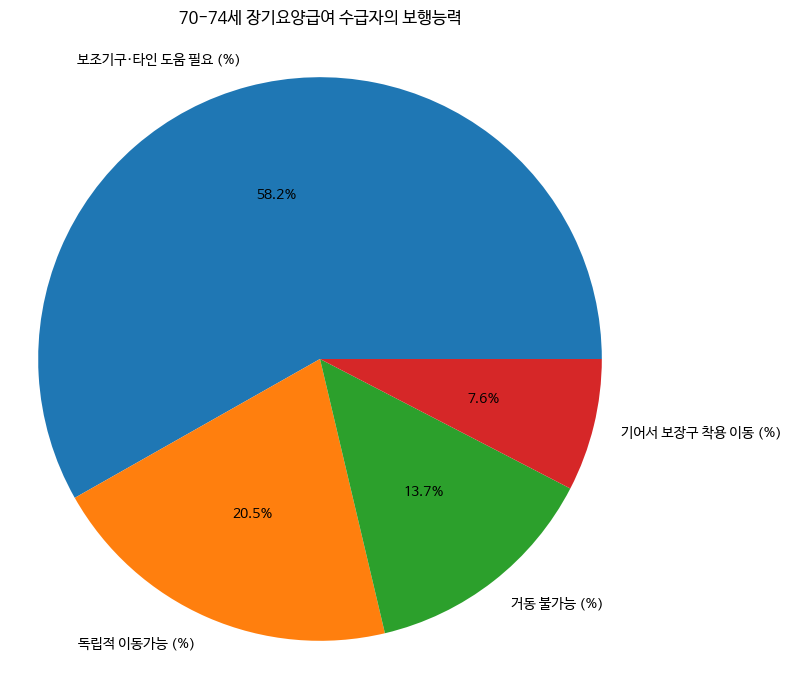

In [81]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_move_extract[6], labels=df_move_extract[0], autopct='%1.1f%%')
plt.axis('equal')
plt.title('70-74세 장기요양급여 수급자의 보행능력\n')
plt.show()

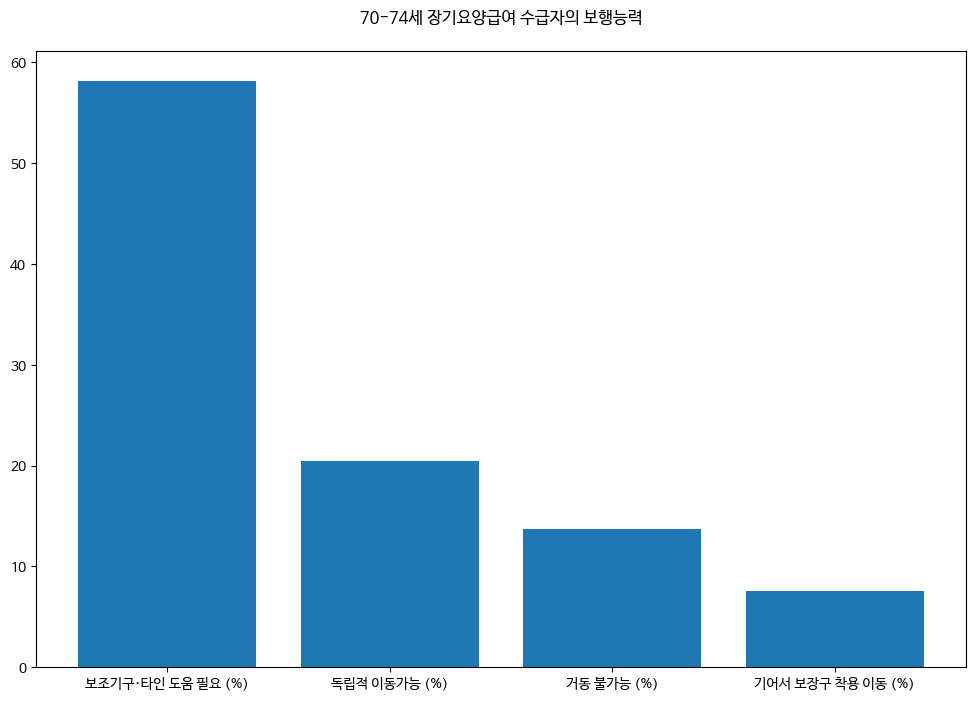

In [83]:
plt.figure(figsize=(12, 8))
plt.bar(x=df_move_extract[0], height=df_move_extract[6])
plt.title('70-74세 장기요양급여 수급자의 보행능력\n')
plt.show()


### 기관 계약시 고려사항
- 추천/평판을 내세우는 마케팅전략 실행

In [84]:
df_consider = pd.read_csv('../New_csv/요양보호/_재가급여_이용자__장기요양기관_계약시_우선_고려사항_20240510150501.csv')
df_consider[:5]

특성별(1)  특성별(2)      2019  2019.1      2019.2     2019.3     2019.4  2019.5  \
0  특성별(1)  특성별(2)  응답자수 (명)  비용 (%)  물리적 환경 (%)  인력 수준 (%)  평가·평판 (%)  거리 (%)   
1      전체      소계    165073    11.4         6.4       26.1        5.6    10.1   
2      성별      남성     44253    12.9         7.1       25.8        6.7     7.1   
3      성별      여성    120819    10.8         6.2       26.2        5.2    11.1   
4     연령별  65세 미만      6084    10.1         6.7       21.7       11.4     7.8   

      2019.6  2019.7  ...  2022.1      2022.2     2022.3  2022.4     2022.5  \
0  소개·추천 (%)  기타 (%)  ...  비용 (%)  물리적 환경 (%)  인력 수준 (%)  규모 (%)  평가·평판 (%)   
1       34.7     5.8  ...      11        12.6       11.8     2.3       14.7   
2       34.2     6.3  ...    11.2          12        9.7     2.4       18.9   
3       34.9     5.6  ...    10.9        12.9       12.6     2.2         13   
4       37.1       5  ...     8.7        14.7        5.8     0.4       18.2   

   2022.6     2022.7     2022.8            2022.9 2022.10  
0  거리 (%)  소개·추천 (%)  운영 주체 (%)  전문 서비스 제공 여부 (%)  기타 (%)  
1    14.5       24.3        1.2               6.9     0.7  
2    14.8       22.2        0.9               6.9       1  
3    14.4       25.1        1.4               6.9     0.5  
4    16.9       25.8          0               5.7     3.9  

[5 rows x 21 columns]

In [85]:
df_consider = df_consider[['특성별(1)', '특성별(2)', '2022', '2022.1', '2022.2', '2022.3',
       '2022.4', '2022.5', '2022.6', '2022.7', '2022.8', '2022.9', '2022.10']]
df_consider.columns = df_consider.loc[0]
df_consider = df_consider[1:]
df_consider.columns

Index(['특성별(1)', '특성별(2)', '응답자수 (명)', '비용 (%)', '물리적 환경 (%)', '인력 수준 (%)',
       '규모 (%)', '평가·평판 (%)', '거리 (%)', '소개·추천 (%)', '운영 주체 (%)',
       '전문 서비스 제공 여부 (%)', '기타 (%)'],
      dtype='object', name=0)

In [86]:
df_consider[['응답자수 (명)', '비용 (%)', '물리적 환경 (%)', '인력 수준 (%)',
       '규모 (%)', '평가·평판 (%)', '거리 (%)', '소개·추천 (%)', '운영 주체 (%)',
       '전문 서비스 제공 여부 (%)', '기타 (%)']] = df_consider[['응답자수 (명)', '비용 (%)', '물리적 환경 (%)', '인력 수준 (%)',
       '규모 (%)', '평가·평판 (%)', '거리 (%)', '소개·추천 (%)', '운영 주체 (%)',
       '전문 서비스 제공 여부 (%)', '기타 (%)']].astype(float)

In [87]:
df_consider_extract = df_consider.loc[df_consider['특성별(2)'] == '70~74세'].T.loc['비용 (%)':].reset_index().sort_values(6, ascending=False) 

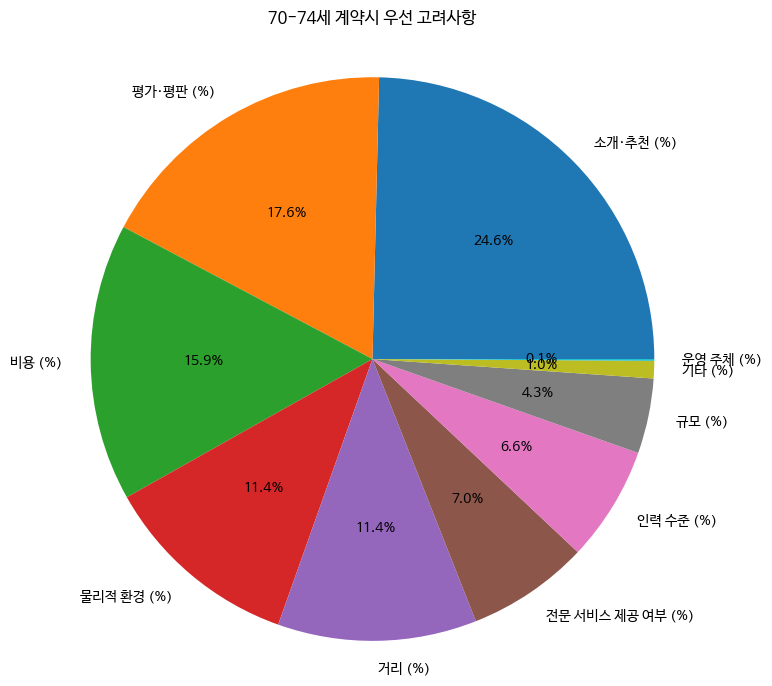

In [88]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_consider_extract[6], labels=df_consider_extract[0], autopct='%1.1f%%')
plt.axis('equal')
plt.title('70-74세 계약시 우선 고려사항\n')
plt.show()

### 관련정보 습득 경로

In [89]:
df_info_path = pd.read_csv('../New_csv/요양보호/_재가급여_이용자__장기요양보험_관련_정보_습득_경로_20240510150412.csv')
df_info_path[:5]

특성별(1)  특성별(2)      2019         2019.1     2019.2   2019.3     2019.4  \
0  특성별(1)  특성별(2)  응답자수 (명)  TV 신문 인터넷 (%)  직계 가족 (%)  친인척 (%)  이웃·지인 (%)   
1      전체      소계    165073            4.7       51.1      3.5       15.6   
2      성별      남성     44254            7.4       44.4      2.6       20.9   
3      성별      여성    120820            3.7       53.6      3.8       13.7   
4     연령별  65세 미만      6083           14.6       30.2      3.1         28   

         2019.5  2019.6  
0  장기요양기관직원 (%)  기타 (%)  
1          15.3     9.8  
2          16.4     8.3  
3          14.9    10.3  
4          11.8    12.3

In [90]:

df_info_path.columns = df_info_path.loc[0]
df_info_path = df_info_path[1:]
df_info_path.columns

Index(['특성별(1)', '특성별(2)', '응답자수 (명)', 'TV 신문 인터넷 (%)', '직계 가족 (%)', '친인척 (%)',
       '이웃·지인 (%)', '장기요양기관직원 (%)', '기타 (%)'],
      dtype='object', name=0)

In [91]:
df_info_path_new = df_info_path[df_info_path['특성별(2)']=='70~74세'].T.iloc[3:].reset_index().sort_values(6, ascending=False)
df_info_path_new

0     6
1      직계 가족 (%)    34
3      이웃·지인 (%)  32.2
0  TV 신문 인터넷 (%)   2.3
4   장기요양기관직원 (%)    19
5         기타 (%)  11.1
2        친인척 (%)   1.4

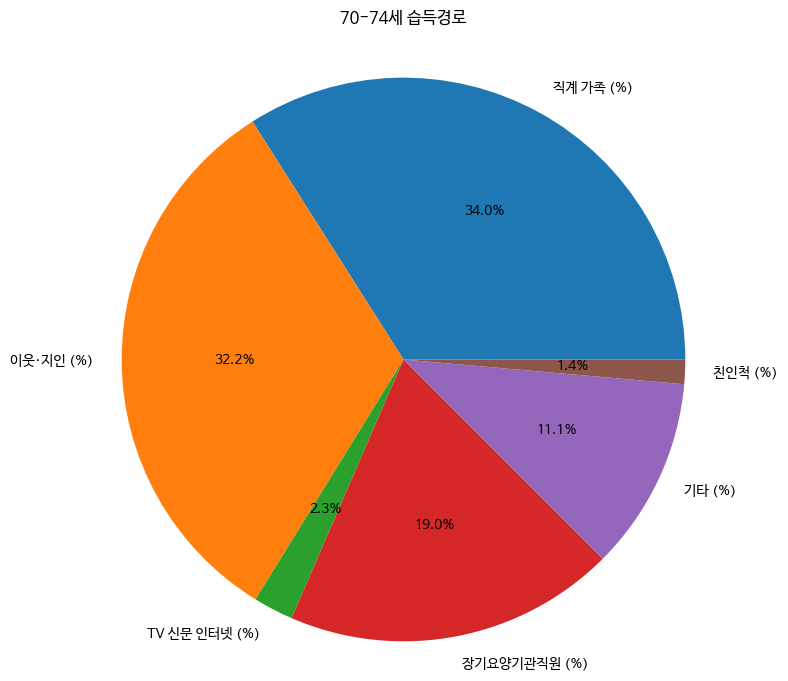

In [92]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_info_path_new[6], labels=df_info_path_new[0], autopct='%1.1f%%')
plt.axis('equal')
plt.title('70-74세 습득경로\n')
plt.show()

## 미이용자의 니즈

### 미이용자의 미이용이유
- 다른사람의 도움을 꺼려함 -> 낯선이를 꺼려함-> 최소한의 접촉

In [247]:
df_reason_notuse = pd.read_csv('../New_csv/요양보호/_미이용자__장기요양급여_미이용_이유_1순위__20240510150709.csv')
df_reason_notuse[:11]

특성별(1)  특성별(2)      2019             2019.1         2019.2  \
0   특성별(1)  특성별(2)  응답자수 (명)  다른 사람의 도움 꺼려함 (%)  가족돌봄으로 충분 (%)   
1       전체      소계    159003               23.4           12.2   
2       성별      남성     51803               27.2           11.4   
3       성별      여성    107201               21.6           12.6   
4     연령대별  65세 미만      8703               16.4           10.2   
5     연령대별  65~69세      7871               29.6            6.8   
6     연령대별  70~74세     13540               28.9            9.3   
7     연령대별  75~79세     30134               20.7           13.6   
8     연령대별  80~84세     42794               24.4           13.2   
9     연령대별  85~89세     35303               23.3           12.1   
10    연령대별  90세 이상     20659               22.4           12.9   

             2019.3                2019.4     2019.5     2019.6  2019.7  \
0   타인의 도움 필요없음 (%)  본인부담금에 대한 경제적 부담 (%)  병원 입원 (%)  병원 선호 (%)  기타 (%)   
1               5.8                   7.3       30.1         10    11.1   
2               4.8                   8.8       28.6        7.1      12   
3               6.3                   6.5       30.9       11.5    10.7   
4                 0                  14.7       39.9        4.5    14.3   
5               2.3                   4.5       33.9        6.8    16.1   
6               7.9                   7.3       29.4        6.6    10.5   
7               6.5                   8.3       28.7        9.2    13.1   
8               7.9                   7.1       27.2       10.4     9.8   
9               5.5                   6.1       31.9       12.1       9   
10              3.4                     6       30.3       12.9    12.1   

        2022             2022.1         2022.2           2022.3  \
0   응답자수 (명)  다른 사람의 도움 꺼려함 (%)  가족돌봄으로 충분 (%)  타인의 도움 필요없음 (%)   
1     238512                 30           16.1              9.6   
2      79280               30.3           18.4               11   
3     159232               29.8             15              8.9   
4      10937               22.4            4.8              9.1   
5      10438               20.3           15.1              9.4   
6      22815               24.8           17.8             19.7   
7      40846               22.3           14.6             12.3   
8      58899               32.8           16.4                7   
9      58903               38.9           15.6              6.9   
10     35675                 28           21.1              9.1   

                  2022.4            2022.5     2022.6     2022.7  \
0   본인부담금에 대한 경제적 부담 (%)  장기요양 불신(불만족) (%)  병원 입원 (%)  병원 선호 (%)   
1                    8.9               4.3       20.9        2.9   
2                   11.4               3.7         17        1.8   
3                    7.7               4.6       22.8        3.4   
4                    9.1                14       31.5          0   
5                   19.7                 5       25.4          0   
6                    2.2               4.7       26.2          0   
7                    9.6               2.1       26.3        4.9   
8                   11.6               5.8       12.9        2.8   
9                    6.1               4.8       18.9        2.4   
10                   9.4                 0       23.3        5.2   

          2022.8  2022.9  
0   서비스 필요없음 (%)  기타 (%)  
1            3.6     3.6  
2            2.3       4  
3            4.2     3.5  
4            4.4     4.7  
5              0     5.1  
6            4.7       0  
7            5.2     2.7  
8            4.3     6.4  
9              4     2.4  
10             0     3.8

In [94]:
df_reason_notuse = df_reason_notuse[['특성별(1)', '특성별(2)', '2022', '2022.1', '2022.2', '2022.3',
       '2022.4', '2022.5', '2022.6', '2022.7', '2022.8', '2022.9']]

In [95]:
df_reason_notuse.columns = df_reason_notuse.loc[0]
df_reason_notuse = df_reason_notuse[1:]

In [96]:
df_reason_notuse.columns

Index(['특성별(1)', '특성별(2)', '응답자수 (명)', '다른 사람의 도움 꺼려함 (%)', '가족돌봄으로 충분 (%)',
       '타인의 도움 필요없음 (%)', '본인부담금에 대한 경제적 부담 (%)', '장기요양 불신(불만족) (%)',
       '병원 입원 (%)', '병원 선호 (%)', '서비스 필요없음 (%)', '기타 (%)'],
      dtype='object', name=0)

In [97]:
df_reason_notuse[['응답자수 (명)', '다른 사람의 도움 꺼려함 (%)', '가족돌봄으로 충분 (%)',
       '타인의 도움 필요없음 (%)', '본인부담금에 대한 경제적 부담 (%)', '병원 입원 (%)', '병원 선호 (%)',
       '기타 (%)']]=df_reason_notuse[['응답자수 (명)', '다른 사람의 도움 꺼려함 (%)', '가족돌봄으로 충분 (%)',
       '타인의 도움 필요없음 (%)', '본인부담금에 대한 경제적 부담 (%)', '병원 입원 (%)', '병원 선호 (%)',
       '기타 (%)']].astype(float)

In [98]:
df_reason_notuse['특성별(2)'].unique()

array(['소계', '남성', '여성', '65세 미만', '65~69세', '70~74세', '75~79세', '80~84세',
       '85~89세', '90세 이상', '대도시', '중소도시', '농어촌', '1등급', '2등급', '3등급',
       '4등급', '5등급', '인지지원등급', '예', '아니오'], dtype=object)

In [99]:
df_reason_notuse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 1 to 21
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   특성별(1)                21 non-null     object 
 1   특성별(2)                21 non-null     object 
 2   응답자수 (명)              21 non-null     float64
 3   다른 사람의 도움 꺼려함 (%)     21 non-null     float64
 4   가족돌봄으로 충분 (%)         21 non-null     float64
 5   타인의 도움 필요없음 (%)       21 non-null     float64
 6   본인부담금에 대한 경제적 부담 (%)  21 non-null     float64
 7   장기요양 불신(불만족) (%)      21 non-null     object 
 8   병원 입원 (%)             21 non-null     float64
 9   병원 선호 (%)             21 non-null     float64
 10  서비스 필요없음 (%)          21 non-null     object 
 11  기타 (%)                21 non-null     float64
dtypes: float64(8), object(4)
memory usage: 2.1+ KB


In [100]:
df_reason_notuse[['응답자수 (명)', '다른 사람의 도움 꺼려함 (%)', '가족돌봄으로 충분 (%)',
       '타인의 도움 필요없음 (%)', '본인부담금에 대한 경제적 부담 (%)', '병원 입원 (%)', '병원 선호 (%)',
       '기타 (%)']]= df_reason_notuse[['응답자수 (명)', '다른 사람의 도움 꺼려함 (%)', '가족돌봄으로 충분 (%)',
       '타인의 도움 필요없음 (%)', '본인부담금에 대한 경제적 부담 (%)', '병원 입원 (%)', '병원 선호 (%)',
       '기타 (%)']].astype(float)

In [101]:
df_reason_notuse_extract = df_reason_notuse.loc[df_reason_notuse['특성별(2)']=='70~74세'].T.loc['다른 사람의 도움 꺼려함 (%)':].astype(float).reset_index().sort_values(6, ascending=False)
df_reason_notuse_extract

0     6
5             병원 입원 (%)  26.2
0     다른 사람의 도움 꺼려함 (%)  24.8
2       타인의 도움 필요없음 (%)  19.7
1         가족돌봄으로 충분 (%)  17.8
4      장기요양 불신(불만족) (%)   4.7
7          서비스 필요없음 (%)   4.7
3  본인부담금에 대한 경제적 부담 (%)   2.2
6             병원 선호 (%)   0.0
8                기타 (%)   0.0

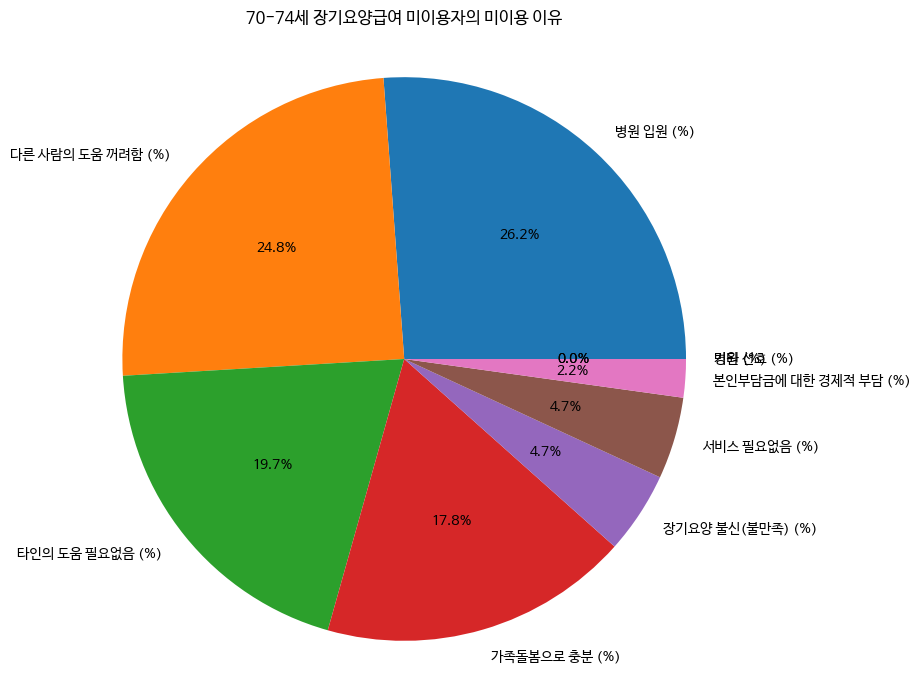

In [102]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_reason_notuse_extract[6], labels=df_reason_notuse_extract[0], autopct='%1.1f%%')
plt.axis('equal')
plt.title('70-74세 장기요양급여 미이용자의 미이용 이유\n')
plt.show()

In [103]:
df_reason_notuse_extract_needhelp = df_reason_notuse_extract.loc[(df_reason_notuse_extract[0] != '타인의 도움 필요없음 (%)') & (df_reason_notuse_extract[0] != '서비스 필요없음 (%)'), :]


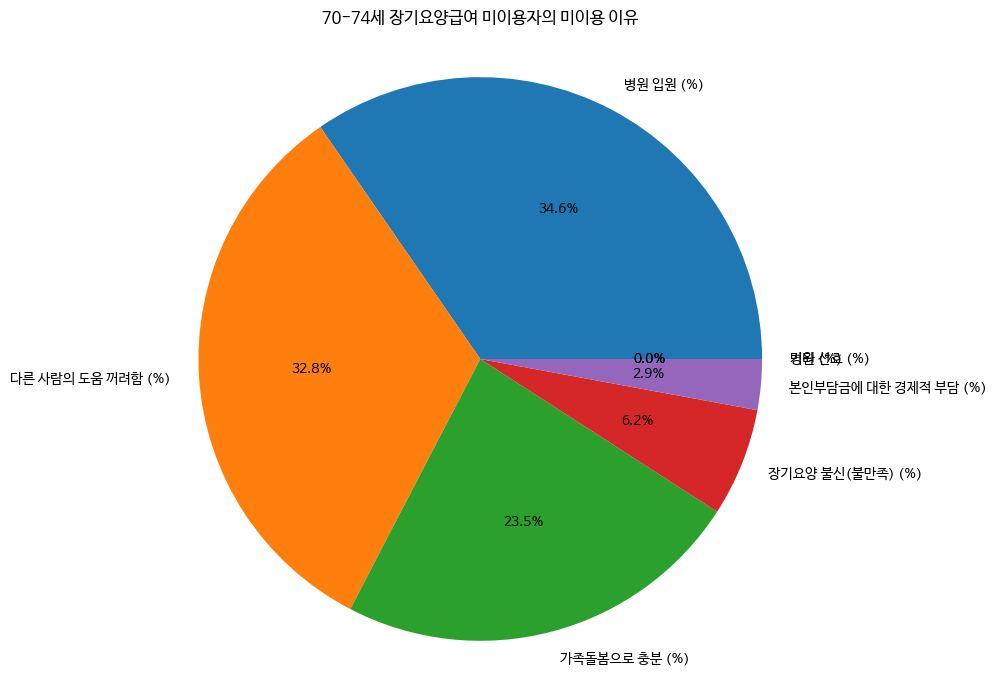

In [104]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_reason_notuse_extract_needhelp[6], labels=df_reason_notuse_extract_needhelp[0], autopct='%1.1f%%')
plt.axis('equal')
plt.title('70-74세 장기요양급여 미이용자의 미이용 이유\n')
plt.show()

### 미이용자의 주 도움자 1순위
- 가족요양보호사_가능=배우자+아들며느리+손자녀친인척+딸사위
- 도움자 1순위 중 73.5%
- 가용인원 16769.025명

- 도우미 24.6

In [249]:
df_assistant_notuse = pd.read_csv('../New_csv/요양보호/_미이용자__일상생활이나_신체수발_주_도움자_1순위__20240510150645.csv')
df_assistant_notuse[:12]

특성별(1)  특성별(2)      2019  2019.1   2019.2      2019.3    2019.4  \
0   특성별(1)  특성별(2)  응답자수 (명)  없음 (%)  배우자 (%)  아들·며느리 (%)  딸·사위 (%)   
1       전체      소계    158081      10       21        17.5      11.8   
2       성별      남성     51270     8.5     44.5         9.1         4   
3       성별      여성    106814    10.8      9.7        21.5      15.5   
4     연령대별  65세 미만      8525     9.2       38         2.1       4.2   
5     연령대별  65~69세      7497    11.9     47.8         4.7       7.1   
6     연령대별  70~74세     13360      16       36         6.7       6.7   
7     연령대별  75~79세     30132     9.5     24.1        16.9       7.7   
8     연령대별  80~84세     42616    12.1     18.1        21.2      13.2   
9     연령대별  85~89세     35302     8.3     14.7        20.7      12.7   
10    연령대별  90세 이상     20646     5.2      6.9        23.4      21.4   
11     지역별     대도시     61833     7.8     22.8        13.7      11.2   

         2019.5   2019.6     2019.7  2019.8      2022  2022.1   2022.2  \
0   손자녀·친인척 (%)  도우미 (%)  이웃·지인 (%)  기타 (%)  응답자수 (명)  없음 (%)  배우자 (%)   
1           2.6     30.2        1.5     5.5    238512     3.6     27.1   
2           3.1       24        2.4     4.4     79280     4.3     52.1   
3           2.3     33.1          1     6.1    159232     3.3     14.7   
4           8.8     29.2        4.2     4.4     10937     4.6     27.3   
5           2.4     21.4        2.4     2.4     10438     5.3     50.4   
6           6.7     21.3          4     2.7     22815     2.5     44.4   
7             3     33.3        1.2     4.5     40846     3.7     31.7   
8           1.4       27          1     5.9     58899     5.5     33.4   
9           1.6     34.7        0.7     6.6     58903     3.7     20.1   
10          0.9     33.6        0.9     7.8     35675       0      5.2   
11          3.2       29        2.7     9.6     94275     2.9     23.6   

        2022.3    2022.4       2022.5   2022.6     2022.7  2022.8  
0   아들·며느리 (%)  딸·사위 (%)  손자녀·친인척 (%)  도우미 (%)  이웃·지인 (%)  기타 (%)  
1         22.8      21.6          3.6     19.3          1       1  
2         12.2      10.3          5.1     12.4          3     0.6  
3         28.1      27.2          2.8     22.8          0     1.2  
4         13.7       9.6         26.7      8.7        4.7     4.6  
5          9.7       4.6            0     20.6        9.4       0  
6         11.4       8.7            9       24          0       0  
7         18.5      19.9          1.3     23.7          0     1.2  
8         22.9      18.3          3.7     14.7        0.7     0.9  
9         27.2      29.2          0.8     17.5        0.7     0.8  
10        34.3      33.4          1.2     24.8          0     1.2  
11          27      20.2          3.3     22.4        0.6       0

In [106]:
df_assistant_notuse = df_assistant_notuse[['특성별(1)', '특성별(2)', '2022', '2022.1', '2022.2',
       '2022.3', '2022.4', '2022.5', '2022.6', '2022.7', '2022.8']]

In [107]:
df_assistant_notuse.columns = df_assistant_notuse.loc[0]
df_assistant_notuse = df_assistant_notuse[1:]

In [108]:
df_assistant_notuse_extract

NameError: name 'df_assistant_notuse_extract' is not defined

In [ ]:
df_assistant_notuse_extract = df_assistant_notuse.loc[df_assistant_notuse['특성별(2)']=='70~74세'].T.loc['배우자 (%)':].astype(float).sort_values(6, ascending=False).reset_index()

In [ ]:
# 파이차트 그리기
plt.figure(figsize=(8,8))
plt.pie(df_assistant_notuse_extract.loc[df_assistant_notuse_extract[6]>0][6], labels=df_assistant_notuse_extract.loc[df_assistant_notuse_extract[6]>0][0], autopct='%1.1f%%')
plt.axis('equal')
plt.title('70-74세 장기요양급여 미이용자의 주 도움자 1순위\n')
plt.show()

In [109]:
df_assistant_notuse_extract_number = df_assistant_notuse.loc[df_assistant_notuse['특성별(2)']=='70~74세'].T.loc['응답자수 (명)':].astype(float).sort_values(6, ascending=False).reset_index()

In [110]:
배우자=df_assistant_notuse_extract_number.loc[df_assistant_notuse_extract_number[0]=='배우자 (%)'][6].values[0]
아들며느리=df_assistant_notuse_extract_number.loc[df_assistant_notuse_extract_number[0]=='아들·며느리 (%)'][6].values[0]
손자녀친인척=df_assistant_notuse_extract_number.loc[df_assistant_notuse_extract_number[0]=='손자녀·친인척 (%)'][6].values[0]
딸사위=df_assistant_notuse_extract_number.loc[df_assistant_notuse_extract_number[0]=='딸·사위 (%)'][6].values[0]
가족요양보호사_가능_비=배우자+아들며느리+손자녀친인척+딸사위
가족요양보호사_가능_수=가족요양보호사_가능_비*df_assistant_notuse_extract_number.loc[df_assistant_notuse_extract_number[0]=='응답자수 (명)'][6].values[0]*0.01

In [111]:
가족요양보호사_가능_수

16769.025

In [112]:
가족요양보호사_가능_비

73.5

## 간병인의 급여 보기 / 희귀질환자의 비율 넣어서 수익 예측하기
- [중앙](https://www.joongang.co.kr/article/25172798) - 간병비 관련 통계자료(물가상승률)
- 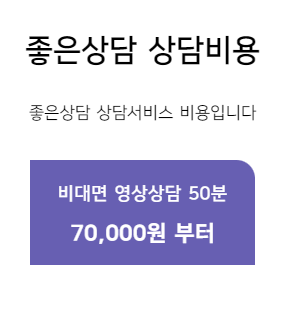
- 70~79세 신경계통 희귀질환자 -1095명. 70-79세의 대략적인 인구 비를 구해서 남성 74세의 비율(0.04747850669505249) 구함....
  1) 서울시 거주 74세 남 인구: 35,504명
  2) 서울시 거주 70-79세 전체 인구: 747,791 ->51.98896483108248%
  3) 70-79세 신경계통 남성 희귀질환자(1095) 중 74세는 51명일 것이라고 예상
  4) 신경계통 희귀 질환자(142993) 중 간병비 지원을 받는(20742.857143) 비율 14.51%
     -> 총 7.54명 = 2021년도 기준 수익 연간 추가 수익
- 전체 인구대비 서울시 거주 74세 남성 = 0.00069 * 신경계통질환자전체(142993) * 신경계통질환자(142993) 중 간병비를 받는사람(18115.857143)의 비율(0.1266905173190296) --> 12.49명 == 2021년도 기준 수익
    35504/51285153*0.14*142993

In [113]:
35504/747791*1095

51.98896483108248

In [114]:
78249/219378

0.356685720537155

In [115]:
18115.857143/142993

0.1266905173190296

In [116]:
35504/747791*1095* 0.14506204599525852

7.541625607572364

In [117]:
# 전체 인구대비 서울시 거주 74세 남성 = 0.00069 * 신경계통질환자전체 * 신경계통질환자 중 간병비를 받는 비율 --> 13.85명
35504/51285153*0.14*142993

13.858889844396098

# 보건의료노조-국민인식조사 -> 사람들이 많이 내고 있는 비용으로 기준점 -> 수익산출

### “하루 간병비 5만원 이하가 적당”... 현실은 “하루 간병비 11만원 이상”(40.8%) from [보건의료노조](https://bogun.nodong.org/xe/khmwu_5_4/763037)
시급 11000원 이상으로 책정
- 70-74세는 요양보호사 기준 3-5시간*20-24일 이용
  -  -> 월수입: 8,243,400원(11,000(시급)*3(시간)*20(일)*13.85(명)) <= 추정 월수입 <= 21,606,000원(13,000(시급)*5(시간)*24(일)*13.85(명))
- 벗 희귀질환자는 매일/12시간이 필요하다고 한다면 30일 기준
  - 54,846,000원(11,000(시급)) <= 추정 월 수입 <= 64,818,000원(13,000(시급))

# 자연어 데이터에서 간병인비용에 대한 의견 보기

## 검색키워드 간병인

In [118]:
import pymongo
def dbconnect(collection) :
    client=pymongo.MongoClient('mongodb://trainings.iptime.org:45003/')
    db= client['data_analysis']
    collection = db[collection]
    data = collection.find()
    df = pd.DataFrame(data)
    return df


In [119]:
df_caregiver = dbconnect("persona2_navercafe_caregiver")

In [120]:
df_caregiver.columns

Index(['_id', 'title', 'name', 'date', 'contents', 'review'], dtype='object')

In [121]:
df_caregiver_extract = df_caregiver[['title', 'contents', 'review']]
df_caregiver_extract['contents_all'] = df_caregiver_extract['title']+df_caregiver_extract['contents']

/tmp/ipykernel_34/1765819931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caregiver_extract['contents_all'] = df_caregiver_extract['title']+df_caregiver_extract['contents']


In [122]:
df_caregiver_extract

title  \
0            간병인비용 보험 하나씩 내용 알아보는 방법   
1                    간병인비용 대해 문의드립니다   
2                    간병인비용 자세히 확인한다면   
3                   간병인비용 간편하게 알아보자면   
4                    간병인비용 확실하게 살펴보기   
...                              ...   
1195  뇌출혈 후 중환자실 21일 오늘 일반병실로 오셨습니다.   
1196       간호간병통합서비스 장점과 특징에 대해 알아보자   
1197      간병보험 가입전 확인해야 할 3가지 핵심 포인트   
1198                  요양병원비용 얼마나 들까요   
1199                     간병인 보험 추천 좀   

                                               contents  \
0     간병인비용 보험 하나씩 내용 알아보는 방법\n간병인비용 및 간병보험에 대해 알아보는...   
1     얼마전에 어머니께서 허리 수술 때문에 간병인을 이용했는데요 간병인비용이 만만치않더라...   
2     간병인비용 자세히 확인한다면\n간병인비용을 선정하거나 추천할 때는 다양한 요소들을 ...   
3     간병인비용 간편하게 알아보자면\n간병인비용 관련 가입 시 주의사항에 대한 설명은 다...   
4     간병인비용 확실하게 살펴보기\n간병인비용은 환자의 상태, 필요한 돌봄 시간, 간병인...   
...                                                 ...   
1195  콧줄 소변줄 기관절개 하고 계시고 의식 없으십니다.\n오늘 뇌출혈 21일차 중환자실...   
1196  간호간병통합서비스란\n보호자나 간병인이 없어도 환자가 안정적인 입원생활을 할 수 있...   
1197  안녕하세요? 친절한보험 김연두 설계사입니다.\n오늘은 간병보험을 가입하기 전 확인해...   
1198  요양병원비용 얼마나 들까요\n아버지께서 수술받으시고 간병인 포함 요양병원에 입원 하...   
1199                        간병인 보험 좀 들어볼까 하는데 추천 좀 해주세요   

                                                 review  \
0     [간병인비용 대해 들어본 적은 있었는데 자세히는 몰랐거든요 이번에 글을 통해서 알게...   
1     [창희맘님\n\n복지질문방에 작성하여 일상수다방으로 이동합니다., 간병보험내용!\n...   
2     [간병인비용에 대해 들어본 적은 있었는데 자세히는 몰랐거든요. 이번에 글을 통해서 ...   
3     [50세 간병인 치매 보험시 대략 얼마나 하나요???\n3~5만 ,5~10만 요런식...   
4     [필요한 사람은 사가겠죠 ^^\n무분별한 언론 기사로 상승 분위기를 호도하지 않았으...   
...                                                 ...   
1195  [기다림의 시간이 얼마나 초조하고 불안하실지 그 심정 이해가 갑니다\n하루빨리 의식...   
1196  [간병인 구하기 어렵더라고요...., 보험되는거죠??, 개인보험으로도 보장받을 수 ...   
1197                                                 []   
1198  [얼마전부터 요양원 알아보고 있어서 요양원이 병원보다 훨 저렴하긴하더라고요\n등급받...   
1199  [쪽지드려요 ㅎㅎ, 비갱신형 체증형간병보험 추천드려요, 카톡에 닉네임 스마트한지점장...   

                                           contents_all  
0     간병인비용 보험 하나씩 내용 알아보는 방법간병인비용 보험 하나씩 내용 알아보는 방법...  
1     간병인비용 대해 문의드립니다얼마전에 어머니께서 허리 수술 때문에 간병인을 이용했는데...  
2     간병인비용 자세히 확인한다면간병인비용 자세히 확인한다면\n간병인비용을 선정하거나 추...  
3     간병인비용 간편하게 알아보자면간병인비용 간편하게 알아보자면\n간병인비용 관련 가입 ...  
4     간병인비용 확실하게 살펴보기간병인비용 확실하게 살펴보기\n간병인비용은 환자의 상태,...  
...                                                 ...  
1195  뇌출혈 후 중환자실 21일 오늘 일반병실로 오셨습니다.콧줄 소변줄 기관절개 하고 계...  
1196  간호간병통합서비스 장점과 특징에 대해 알아보자간호간병통합서비스란\n보호자나 간병인이...  
1197  간병보험 가입전 확인해야 할 3가지 핵심 포인트안녕하세요? 친절한보험 김연두 설계사...  
1198  요양병원비용 얼마나 들까요요양병원비용 얼마나 들까요\n아버지께서 수술받으시고 간병인...  
1199             간병인 보험 추천 좀간병인 보험 좀 들어볼까 하는데 추천 좀 해주세요  

[1200 rows x 4 columns]

In [123]:
df_caregiver_extract['review'] = df_caregiver_extract['review'].apply(lambda x: ' '.join(x))

/tmp/ipykernel_34/1880494637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caregiver_extract['review'] = df_caregiver_extract['review'].apply(lambda x: ' '.join(x))


In [124]:
df_caregiver_extract_final = df_caregiver_extract[['contents_all', 'review']]

In [125]:
# 홍보문구 포함하는 행 삭제
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('알아보는 방법')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('확인한다면')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('알아보자면')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('간단하게 알아보자면')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('살펴보기')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('알아보기')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('플랜')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('베스트플랜')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('자세히 알아보자면')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('참고할 내용은?')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('살펴보자면')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('참고할 내용은?')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('준비하는 방법')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('삼성화재 간병인보험')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('살펴보는')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('실속있는')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('알아보자!')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('보장내용 알아봐요')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('곰마을')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('준비하세요!')]


In [126]:
df_caregiver_extract_final = df_caregiver_extract_final.reset_index()
df_caregiver_extract_final.drop(columns='index', inplace=True)

In [127]:
# 특정 열에서 \n 삭제하는 함수
def remove_text(row) :
    row = row.replace('\n',' ')
    row = row.replace('\n\n',' ')
    return row

In [128]:
df_caregiver_extract_final['contents_all'] = df_caregiver_extract_final['contents_all'].apply(remove_text)

In [129]:
df_caregiver_extract_final['review'] = df_caregiver_extract_final['review'].apply(remove_text)

In [130]:
df_caregiver_extract_final['contents_all'] = df_caregiver_extract_final['contents_all']+df_caregiver_extract_final['review']

In [131]:
# 불용어 리스트 생성 (예시)
stopwords = ['드리다','로션', '제왕절개', '백프로', '담요','산후','바디','을', '를', '이', '는','곰','수록', '속', '때', '원', '게', '거', '컨', '철', '뭘까요','레이터','겻','텍','느네','괘','ㅈ','만','수','주','달','날','저', '상품', '제', '경유', '나', '알아보']
from konlpy.tag import Okt

# Okt 형태소 분석기 인스턴스 생성
okt = Okt()

# 토크나이징 함수 정의
def tokenizer(raw, pos=["Noun", "Adverb", "Verb"], stopword=stopwords):
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅏ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
    ]

In [132]:
# tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
# tfidfVectorizer = TfidfVectorizer(tokenizer=tokenizer, max_df=0.95, min_df=2)
tfidfVectorizer = TfidfVectorizer(tokenizer=tokenizer, max_df=0.85, min_df=2)

In [133]:
features = tfidfVectorizer.fit_transform(df_caregiver_extract_final['contents_all'])
features.toarray()[:2]

/usr/local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [134]:
import pyLDAvis
import pyLDAvis.lda_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [4]:
components_3  = LatentDirichletAllocation(n_components=3, n_jobs=-1) # n_components => topic 가짓수 결정 / n_jobs =>성능높이기
components_3.fit(features)

NameError: name 'LatentDirichletAllocation' is not defined

In [5]:
vis = pyLDAvis.lda_model.prepare(components_3, features, tfidfVectorizer) # 토픽모델, 교육이 끝난 값(행렬형태), 교육모델

NameError: name 'pyLDAvis' is not defined

In [2]:
pyLDAvis.enable_notebook()


NameError: name 'pyLDAvis' is not defined

In [138]:
dictionary_list = tfidfVectorizer.get_feature_names_out(features)
dictionary_list

array(['가가', '가게', '가격', ..., '힘내다', '힘빠지다', '힘쓰다'], dtype=object)

In [139]:
components_3.components_

array([[ 1.11939961,  1.6245613 , 10.9144414 , ...,  6.35356662,
         0.39470438,  0.54633041],
       [ 0.33516348,  0.33496058,  0.33505026, ...,  0.33467627,
         0.3340681 ,  0.33488877],
       [ 0.33516377,  0.33495801,  0.33505069, ...,  0.33467608,
         0.33406836,  0.33488943]])

In [140]:
topics_output = components_3.transform(features)
df_topics_score = pd.DataFrame(data=topics_output)

In [141]:
import numpy as np
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1)

In [142]:
df_topics_score['dominant_topic_number']

0       0
1       0
2       0
3       0
4       0
       ..
1000    0
1001    0
1002    0
1003    0
1004    0
Name: dominant_topic_number, Length: 1005, dtype: int64

In [143]:
## 상위 단어 추출
## 0 확률 1은 dictionary
topics_list = list()
for topic in components_3.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:10])# 시리즈 형식으로 출력 get values from series / index
    print(topics_text)
    topics_list.append(topics_text)


topics_list_add = [topics_list, ['Topic1', 'Topic2', 'Topic3']]
df_topics_keywords = pd.DataFrame(topics_list_add)

보험 간병 병원 입원 가입 받다 보다 수술 하루 환자
교재 공제 세액 인쇄 강의 세부 삭제 절대 해치다 사항
소득공제 기만 해치다 할경 대처 현금영수증 정해지다 해달라다 자신 의주


In [144]:
df_topics_keywords.columns = df_topics_keywords.loc[1]

In [145]:
df_topics_keywords = df_topics_keywords[:1]

In [146]:
df_topics_keywords

1                         Topic1                          Topic2  \
0  보험 간병 병원 입원 가입 받다 보다 수술 하루 환자  교재 공제 세액 인쇄 강의 세부 삭제 절대 해치다 사항   

1                                   Topic3  
0  소득공제 기만 해치다 할경 대처 현금영수증 정해지다 해달라다 자신 의주

In [147]:
df_caregiver_extract_final['topic'] =df_topics_score['dominant_topic_number']

In [148]:
df_caregiver_extract_final

contents_all  \
0     간병인비용 대해 문의드립니다얼마전에 어머니께서 허리 수술 때문에 간병인을 이용했는데...   
1     간병인비용 관해서 질문 있습니다저희 어머니가 사고를 당해서 입원중에 있으신데 간병인...   
2     간병인 비용 등..85세 아버지.. 4월1일 입원하시기전에는 들어와서 글만 읽고 나...   
3     간병인비용 문의드립니다저희 아버지가 사고를 당하셔서 입원중에 있으신데요 간병인이 필...   
4     간병인비용 대해서 질문 드립니다저희어머니께서 입원을 하고 있어서 간병인을 구하려고 ...   
...                                                 ...   
1000  간병인 보험 비용 어느정도 하나요저희 부모님이 60대초반 이신데 나이대 안비슷 하더...   
1001  뇌출혈 후 중환자실 21일 오늘 일반병실로 오셨습니다.콧줄 소변줄 기관절개 하고 계...   
1002  간호간병통합서비스 장점과 특징에 대해 알아보자간호간병통합서비스란 보호자나 간병인이 ...   
1003  요양병원비용 얼마나 들까요요양병원비용 얼마나 들까요 아버지께서 수술받으시고 간병인 ...   
1004  간병인 보험 추천 좀간병인 보험 좀 들어볼까 하는데 추천 좀 해주세요쪽지드려요 ㅎㅎ...   

                                                 review  topic  
0     창희맘님  복지질문방에 작성하여 일상수다방으로 이동합니다. 간병보험내용!  간병보험...      0  
1     체중에 따라서 금액이 달라진다고 하는데 잘 알아보세요 요즘 기본하루에 12만원부터시...      0  
2     간병인들 금전 요구는 원래 끝이 없어요. 적당선에서 자를건 자르시고 타협을 보셔야 ...      0  
3     간병보험내용!  간병보험 비교사이트 이용시 주요 보험 상품들을 대부분 확인이 가능하...      0  
4     24기간 12-15정도 합니다. 병원에서는 간병인 시간제로 안할겁니다. 짐싸들고 2...      0  
...                                                 ...    ...  
1000  저희 엄마 64세 시거든요 7만원대 나왔어요 만기 환급형 인가요? 100세로 잡으면...      0  
1001  기다림의 시간이 얼마나 초조하고 불안하실지 그 심정 이해가 갑니다 하루빨리 의식이 ...      0  
1002  간병인 구하기 어렵더라고요.... 보험되는거죠?? 개인보험으로도 보장받을 수 있죠?...      0  
1003  얼마전부터 요양원 알아보고 있어서 요양원이 병원보다 훨 저렴하긴하더라고요 등급받는걸...      0  
1004  쪽지드려요 ㅎㅎ 비갱신형 체증형간병보험 추천드려요 카톡에 닉네임 스마트한지점장 검색...      0  

[1005 rows x 3 columns]

In [149]:
df_topics_score['dominant_topic_number']


0       0
1       0
2       0
3       0
4       0
       ..
1000    0
1001    0
1002    0
1003    0
1004    0
Name: dominant_topic_number, Length: 1005, dtype: int64

In [150]:
df_caregiver_extract_final['topic'].unique()

array([0, 1])

In [151]:
df_caregiver_extract_final.groupby('topic').count()

contents_all  review
topic                      
0              1004    1004
1                 1       1

In [152]:
df_caregiver_extract_final.loc[df_caregiver_extract_final['topic']==0]

contents_all  \
0     간병인비용 대해 문의드립니다얼마전에 어머니께서 허리 수술 때문에 간병인을 이용했는데...   
1     간병인비용 관해서 질문 있습니다저희 어머니가 사고를 당해서 입원중에 있으신데 간병인...   
2     간병인 비용 등..85세 아버지.. 4월1일 입원하시기전에는 들어와서 글만 읽고 나...   
3     간병인비용 문의드립니다저희 아버지가 사고를 당하셔서 입원중에 있으신데요 간병인이 필...   
4     간병인비용 대해서 질문 드립니다저희어머니께서 입원을 하고 있어서 간병인을 구하려고 ...   
...                                                 ...   
1000  간병인 보험 비용 어느정도 하나요저희 부모님이 60대초반 이신데 나이대 안비슷 하더...   
1001  뇌출혈 후 중환자실 21일 오늘 일반병실로 오셨습니다.콧줄 소변줄 기관절개 하고 계...   
1002  간호간병통합서비스 장점과 특징에 대해 알아보자간호간병통합서비스란 보호자나 간병인이 ...   
1003  요양병원비용 얼마나 들까요요양병원비용 얼마나 들까요 아버지께서 수술받으시고 간병인 ...   
1004  간병인 보험 추천 좀간병인 보험 좀 들어볼까 하는데 추천 좀 해주세요쪽지드려요 ㅎㅎ...   

                                                 review  topic  
0     창희맘님  복지질문방에 작성하여 일상수다방으로 이동합니다. 간병보험내용!  간병보험...      0  
1     체중에 따라서 금액이 달라진다고 하는데 잘 알아보세요 요즘 기본하루에 12만원부터시...      0  
2     간병인들 금전 요구는 원래 끝이 없어요. 적당선에서 자를건 자르시고 타협을 보셔야 ...      0  
3     간병보험내용!  간병보험 비교사이트 이용시 주요 보험 상품들을 대부분 확인이 가능하...      0  
4     24기간 12-15정도 합니다. 병원에서는 간병인 시간제로 안할겁니다. 짐싸들고 2...      0  
...                                                 ...    ...  
1000  저희 엄마 64세 시거든요 7만원대 나왔어요 만기 환급형 인가요? 100세로 잡으면...      0  
1001  기다림의 시간이 얼마나 초조하고 불안하실지 그 심정 이해가 갑니다 하루빨리 의식이 ...      0  
1002  간병인 구하기 어렵더라고요.... 보험되는거죠?? 개인보험으로도 보장받을 수 있죠?...      0  
1003  얼마전부터 요양원 알아보고 있어서 요양원이 병원보다 훨 저렴하긴하더라고요 등급받는걸...      0  
1004  쪽지드려요 ㅎㅎ 비갱신형 체증형간병보험 추천드려요 카톡에 닉네임 스마트한지점장 검색...      0  

[1004 rows x 3 columns]

### Topic0의 내용분석

#### 중요도 고려한 워드클라우드

In [153]:
from mecab import MeCab
mecab = MeCab()

In [154]:
morphs_nouns = []
morphs_nouns_list = []
for row in df_caregiver_extract_final['contents_all']:
    morphs = mecab.nouns(row)
    morphs_nouns.append(morphs)
    morphs_nouns_list = morphs_nouns_list + morphs # 감정분석할 땐, 부사/형용사 등등도 포함
    pass

In [155]:
df_caregiver_extract_final.query('topic==0')['contents_all']

0       간병인비용 대해 문의드립니다얼마전에 어머니께서 허리 수술 때문에 간병인을 이용했는데...
1       간병인비용 관해서 질문 있습니다저희 어머니가 사고를 당해서 입원중에 있으신데 간병인...
2       간병인 비용 등..85세 아버지.. 4월1일 입원하시기전에는 들어와서 글만 읽고 나...
3       간병인비용 문의드립니다저희 아버지가 사고를 당하셔서 입원중에 있으신데요 간병인이 필...
4       간병인비용 대해서 질문 드립니다저희어머니께서 입원을 하고 있어서 간병인을 구하려고 ...
                              ...                        
1000    간병인 보험 비용 어느정도 하나요저희 부모님이 60대초반 이신데 나이대 안비슷 하더...
1001    뇌출혈 후 중환자실 21일 오늘 일반병실로 오셨습니다.콧줄 소변줄 기관절개 하고 계...
1002    간호간병통합서비스 장점과 특징에 대해 알아보자간호간병통합서비스란 보호자나 간병인이 ...
1003    요양병원비용 얼마나 들까요요양병원비용 얼마나 들까요 아버지께서 수술받으시고 간병인 ...
1004    간병인 보험 추천 좀간병인 보험 좀 들어볼까 하는데 추천 좀 해주세요쪽지드려요 ㅎㅎ...
Name: contents_all, Length: 1004, dtype: object

In [156]:
df_caregiver_extract_final.query('topic==0')

contents_all  \
0     간병인비용 대해 문의드립니다얼마전에 어머니께서 허리 수술 때문에 간병인을 이용했는데...   
1     간병인비용 관해서 질문 있습니다저희 어머니가 사고를 당해서 입원중에 있으신데 간병인...   
2     간병인 비용 등..85세 아버지.. 4월1일 입원하시기전에는 들어와서 글만 읽고 나...   
3     간병인비용 문의드립니다저희 아버지가 사고를 당하셔서 입원중에 있으신데요 간병인이 필...   
4     간병인비용 대해서 질문 드립니다저희어머니께서 입원을 하고 있어서 간병인을 구하려고 ...   
...                                                 ...   
1000  간병인 보험 비용 어느정도 하나요저희 부모님이 60대초반 이신데 나이대 안비슷 하더...   
1001  뇌출혈 후 중환자실 21일 오늘 일반병실로 오셨습니다.콧줄 소변줄 기관절개 하고 계...   
1002  간호간병통합서비스 장점과 특징에 대해 알아보자간호간병통합서비스란 보호자나 간병인이 ...   
1003  요양병원비용 얼마나 들까요요양병원비용 얼마나 들까요 아버지께서 수술받으시고 간병인 ...   
1004  간병인 보험 추천 좀간병인 보험 좀 들어볼까 하는데 추천 좀 해주세요쪽지드려요 ㅎㅎ...   

                                                 review  topic  
0     창희맘님  복지질문방에 작성하여 일상수다방으로 이동합니다. 간병보험내용!  간병보험...      0  
1     체중에 따라서 금액이 달라진다고 하는데 잘 알아보세요 요즘 기본하루에 12만원부터시...      0  
2     간병인들 금전 요구는 원래 끝이 없어요. 적당선에서 자를건 자르시고 타협을 보셔야 ...      0  
3     간병보험내용!  간병보험 비교사이트 이용시 주요 보험 상품들을 대부분 확인이 가능하...      0  
4     24기간 12-15정도 합니다. 병원에서는 간병인 시간제로 안할겁니다. 짐싸들고 2...      0  
...                                                 ...    ...  
1000  저희 엄마 64세 시거든요 7만원대 나왔어요 만기 환급형 인가요? 100세로 잡으면...      0  
1001  기다림의 시간이 얼마나 초조하고 불안하실지 그 심정 이해가 갑니다 하루빨리 의식이 ...      0  
1002  간병인 구하기 어렵더라고요.... 보험되는거죠?? 개인보험으로도 보장받을 수 있죠?...      0  
1003  얼마전부터 요양원 알아보고 있어서 요양원이 병원보다 훨 저렴하긴하더라고요 등급받는걸...      0  
1004  쪽지드려요 ㅎㅎ 비갱신형 체증형간병보험 추천드려요 카톡에 닉네임 스마트한지점장 검색...      0  

[1004 rows x 3 columns]

In [157]:
df_caregiver_extract_final.query('topic==0').loc[df_caregiver_extract_final.query('topic==0')['contents_all'].str.contains('부담')]

contents_all  \
2     간병인 비용 등..85세 아버지.. 4월1일 입원하시기전에는 들어와서 글만 읽고 나...   
8     간병인 사용 비용도 실비보험에서 보상되나요?안녕하세요~^^ 보험전문가 조은애 팀장입...   
10    호스피스병동 간병인 비용 혜택엄마를 집에서 동생들과 케어를 하다가.안좋아지셔서 어제...   
13    간병인비용 부담 이제 그만하자.간병인비용 부담 이제 그만하자. 거친 파도처럼 삶 속...   
15    간병인보험 비용 비교하기 까다롭네요간병인 보험 비용에 대해 고민 중이에요. 보통 보...   
...                                                 ...   
997   간병인지원 특약이 있던데 좋은건가요?보험을 알아보다가 보니까 간병인지원 특약이 있던...   
998   부모님간병보험 간병인지원과 간병인사용일당의 차이점 비교~간병인보험 간병인지원과 간병...   
999   간병인간병인을쓰면 간병인비용이 실비에서 같이 나오나요?간병인보험은 따로 가입하셔야 ...   
1002  간호간병통합서비스 장점과 특징에 대해 알아보자간호간병통합서비스란 보호자나 간병인이 ...   
1003  요양병원비용 얼마나 들까요요양병원비용 얼마나 들까요 아버지께서 수술받으시고 간병인 ...   

                                                 review  topic  
2     간병인들 금전 요구는 원래 끝이 없어요. 적당선에서 자를건 자르시고 타협을 보셔야 ...      0  
8     안녕하세요~^^ 행복소망 팀장입니다  2024년 5월달입니다  보험가입 생각하셨던 ...      0  
10    간병비는 산정특례가 되질 않습니다.. 네 감사합니다 간병보험은보통따로가입하셔야되고,...      0  
13                                     간병인비용이 얼마정도 하나요?      0  
15    공유 부탁드려요~ 간병인 보험을 선택할 때는 각 보험사의 보장 내용과 비용을 면밀히...      0  
...                                                 ...    ...  
997   안녕하세요~재테크레시프 운영자입니다. 간병인지원 특약의 경우 특징은 입원만 했을때에...      0  
998      간병은 진짜 힘들더라구요 간병인보험 강력 추천~~^^ 간병인비용 진짜 비싸던데...      0  
999   간병인보험은 따로 가입하셔야 합니다. 네 ~감사합니다 간병인은 개인적인 사비로 이용...      0  
1002  간병인 구하기 어렵더라고요.... 보험되는거죠?? 개인보험으로도 보장받을 수 있죠?...      0  
1003  얼마전부터 요양원 알아보고 있어서 요양원이 병원보다 훨 저렴하긴하더라고요 등급받는걸...      0  

[377 rows x 3 columns]

In [158]:
morphs_nouns_list

['간병인',
 '비용',
 '문',
 '얼마',
 '전',
 '어머니',
 '허리',
 '수술',
 '때문',
 '간병인',
 '이용',
 '간병인',
 '비용',
 '간병인',
 '비용',
 '보험',
 '쪽',
 '번',
 '보험',
 '간병인',
 '비용',
 '지원',
 '문',
 '창희',
 '맘',
 '복지',
 '질문',
 '방',
 '작성',
 '일상',
 '수다',
 '방',
 '이동',
 '간병',
 '보험',
 '내용',
 '간병',
 '보험',
 '비교',
 '사이트',
 '용시',
 '주요',
 '보험',
 '상품',
 '대부분',
 '확인',
 '가능',
 '특정',
 '보험',
 '사',
 '중점',
 '것',
 '보험',
 '상품',
 '보장',
 '내용',
 '비용',
 '비교',
 '게',
 '간병',
 '보험',
 '확인',
 '기존',
 '실비',
 '종합',
 '보험',
 '등',
 '간병인',
 '비용',
 '지급',
 '것',
 '간병인',
 '보험',
 '것',
 '병원',
 '간호',
 '간병',
 '통합',
 '서비스',
 '병동',
 '의료',
 '급여',
 '거우',
 '무료',
 '일반',
 '만',
 '원',
 '정도',
 '이용',
 '가능',
 '간병인',
 '간병인',
 '지원',
 '보험',
 '간병인',
 '사용',
 '일',
 '가입',
 '금액',
 '간병인',
 '사용',
 '일당',
 '보험',
 '최근',
 '허리',
 '수술',
 '가입',
 '수',
 '회사',
 '것',
 '간병인',
 '비용',
 '질문',
 '저희',
 '어머니',
 '사고',
 '입원',
 '중',
 '데',
 '간병인',
 '간병인',
 '비용',
 '형성',
 '질문',
 '간병인',
 '비용',
 '감사',
 '체중',
 '금액',
 '기본',
 '하루',
 '만',
 '원',
 '시작',
 '고함',
 '경기도',
 '저희',
 '엄마',
 '정형',
 '외',
 '만',
 '원',
 '하루',
 '업체

In [159]:
corpus = list(map(lambda x:' '.join(x), morphs_nouns))

In [160]:
corpus

['간병인 비용 문 얼마 전 어머니 허리 수술 때문 간병인 이용 간병인 비용 간병인 비용 보험 쪽 번 보험 간병인 비용 지원 문 창희 맘 복지 질문 방 작성 일상 수다 방 이동 간병 보험 내용 간병 보험 비교 사이트 용시 주요 보험 상품 대부분 확인 가능 특정 보험 사 중점 것 보험 상품 보장 내용 비용 비교 게 간병 보험 확인 기존 실비 종합 보험 등 간병인 비용 지급 것 간병인 보험 것 병원 간호 간병 통합 서비스 병동 의료 급여 거우 무료 일반 만 원 정도 이용 가능 간병인 간병인 지원 보험 간병인 사용 일 가입 금액 간병인 사용 일당 보험 최근 허리 수술 가입 수 회사 것',
 '간병인 비용 질문 저희 어머니 사고 입원 중 데 간병인 간병인 비용 형성 질문 간병인 비용 감사 체중 금액 기본 하루 만 원 시작 고함 경기도 저희 엄마 정형 외 만 원 하루 업체 조금 차이 만 시작 기저귀 만 환자 상태 지와 체중 차이 하루 만 원 명절 주휴 수당 주 열흘 그때 하루치 간식 거 코로나 때 간병인 돈 저희 엄마 이번 무릎 수술 다인 실 수술 환자 곳 병비 돈 하루 오만 오 천 원 일',
 '간병인 비용 등 세 아버지 월 일 입원 전 글 입원 여기 글 날 오늘 지난주 목요일 간병인 게 하루 만 원 남자 간병인 남자 걸로 제 곳 이분 의사 파업 거 환자 간병인 식사 제공 자기 보호자 부담 주기 집 병원 앞 원래 간병 비용 식사 포함 환자 식사 제공 건가요 어제 저녁 어디 아버지 전화 집 섬망 정신 이상 환자 등등 나중 스피커폰 셋 통화 오해 이분 아버지 시간 안 귀 섬망 거 저 전화 미안 미안 수십 번 이것 섬망 증세 이분 간병인 오전 시간 오후 시간 시간 거 간병인 대표 할머니 병원 간병인 전화 소개 곳 도 처음 말 비용 이게 끝 식사 제공 게 건지 오전 오후 시간 건지 안마 세수 머리 감기 손발톱 등 말 자기 형 의사 원래 않 데 거 어제 밤 기저귀 거 비용 때 입금 아버지 거 입원 일 흉수 거동 식사량 죽 반 반 이제 설사 교수 항생제 부작용 원인 검사 간호 

In [161]:
# stop_word = 필요없는 단어(단어str, 배열, callback함수) 제외, ngram_range=결합어에 사용>문장 이해도 높아져서 성능 올라감
result_vectors = tfidfVectorizer.fit_transform(corpus)
result_vectors

/usr/local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<1005x3413 sparse matrix of type '<class 'numpy.float64'>'
	with 68497 stored elements in Compressed Sparse Row format>

In [162]:
dtm = result_vectors.toarray()
dtm.shape

(1005, 3413)

In [163]:
dense = result_vectors.todense()
denselist = dense.tolist()

In [164]:
voca = tfidfVectorizer.get_feature_names_out()
voca[0]

'가게'

In [165]:
df_dtm = pd.DataFrame(dtm, columns = voca)


In [166]:
tfidf_dict = {}
for doc in denselist:
    for i in range(len(voca)):
        tfidf_dict[voca[i]] = doc[i]
tfidf_dict

{'가게': 0.0,
 '가격': 0.0,
 '가격표': 0.0,
 '가계': 0.0,
 '가구': 0.0,
 '가까이': 0.0,
 '가난': 0.0,
 '가능': 0.12427720547519525,
 '가다': 0.0,
 '가동': 0.0,
 '가래': 0.0,
 '가량': 0.0,
 '가방': 0.0,
 '가병': 0.0,
 '가분': 0.0,
 '가사': 0.0,
 '가성': 0.0,
 '가스': 0.0,
 '가슴': 0.0,
 '가시': 0.0,
 '가시다': 0.0,
 '가액': 0.0,
 '가요': 0.0,
 '가운데': 0.0,
 '가을': 0.0,
 '가이드라인': 0.0,
 '가입': 0.07933592169091555,
 '가입자': 0.0,
 '가장': 0.0,
 '가정': 0.0,
 '가족': 0.015398561521074076,
 '가중': 0.0,
 '가지': 0.022709888322304164,
 '가지각색': 0.0,
 '가치': 0.0,
 '가해자': 0.0,
 '각각': 0.0,
 '각광': 0.0,
 '각도': 0.0,
 '각심': 0.0,
 '각자': 0.0,
 '각종': 0.0,
 '각지': 0.0,
 '각출': 0.0,
 '간격': 0.0,
 '간경': 0.0,
 '간과': 0.0,
 '간변': 0.0,
 '간병': 0.08408134691299012,
 '간섭': 0.0,
 '간성': 0.0,
 '간식': 0.0,
 '간암': 0.0,
 '간염': 0.0,
 '간이': 0.0,
 '간접': 0.0,
 '간청': 0.0,
 '간평': 0.0,
 '간호': 0.08726770898612517,
 '간호병': 0.0,
 '간호사': 0.0,
 '간호원': 0.0,
 '간호조무사': 0.0,
 '갈고': 0.0,
 '갈다': 0.0,
 '갈등': 0.0,
 '갈비뼈': 0.0,
 '감각': 0.0,
 '감기': 0.0,
 '감다': 0.0,
 '감당': 0.0,
 '감독': 0.0,
 '감동': 0.0,
 '감사': 0

In [167]:
from wordcloud import WordCloud
wordCloud = WordCloud(background_color='white', font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

In [168]:
wordCloud.generate_from_frequencies(tfidf_dict)

In [169]:
wordCloud.words_

{'지원': 1.0,
 '보험': 0.9823171286208363,
 '일당': 0.5359334050310118,
 '지급': 0.47323560874842574,
 '사용': 0.45735133340171613,
 '갱신': 0.34189180200227165,
 '입원': 0.34181368573301124,
 '회사': 0.33857550917575147,
 '의원': 0.3133053434164761,
 '카톡': 0.28811888691900633,
 '가능': 0.28188272664007247,
 '경우': 0.26247511296569054,
 '비교': 0.2586057903411615,
 '한도': 0.24570104560044137,
 '추천': 0.2435247807649781,
 '체증': 0.23937328674914157,
 '병원': 0.23916356916671705,
 '수익': 0.2330741817453796,
 '서비스': 0.22794206272726475,
 '플랜': 0.22610147256590346,
 '통합': 0.2247673530323023,
 '병비': 0.22148005507770047,
 '금액': 0.2194461846210898,
 '선택': 0.2187562376586045,
 '업무': 0.21717144469569796,
 '보장': 0.2009020610274349,
 '간호': 0.19793862971557674,
 '간병': 0.1907113958410824,
 '제외': 0.1887320792705746,
 '줄다': 0.1828736969974962,
 '가입': 0.17994793044491258,
 '검색': 0.1776251392448787,
 '쪽지': 0.1685269836590373,
 '상담': 0.16748507917433986,
 '지장': 0.167206598992049,
 '설계': 0.16698964978086014,
 '특별': 0.162273695695144

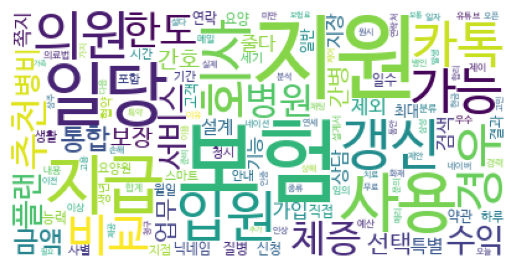

In [170]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

#### 빈도수만 고려한 워드클라우드

In [171]:
from collections import Counter
noun_count = Counter(morphs_nouns_list)
noun_count

Counter({'간병인': 9842,
         '보험': 5847,
         '병원': 3876,
         '원': 3593,
         '만': 3395,
         '비용': 2779,
         '간병': 2757,
         '일': 2734,
         '수': 2610,
         '것': 2374,
         '거': 2203,
         '분': 1989,
         '입원': 1732,
         '가입': 1550,
         '저': 1393,
         '환자': 1306,
         '감사': 1294,
         '요양': 1244,
         '게': 1209,
         '시간': 1188,
         '지원': 1174,
         '정도': 1165,
         '저희': 1164,
         '때': 1156,
         '병비': 1147,
         '수술': 1120,
         '가능': 1102,
         '일당': 1087,
         '년': 1038,
         '필요': 1021,
         '상품': 1014,
         '가족': 964,
         '하루': 957,
         '사용': 925,
         '경우': 903,
         '보장': 897,
         '보험료': 867,
         '간': 846,
         '중': 841,
         '생각': 840,
         '제': 828,
         '부담': 731,
         '재활': 710,
         '갱신': 706,
         '금액': 692,
         '엄마': 675,
         '시': 646,
         '후': 643,
         '보호자': 641,
  

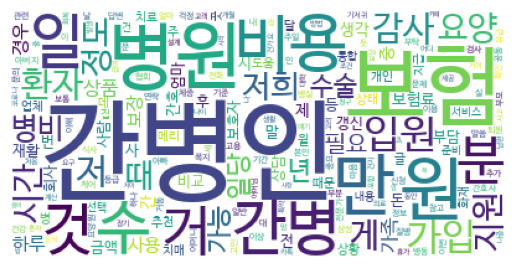

In [172]:
wordCloud.generate_from_frequencies(noun_count)
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

## 검색키워드 희귀질환간병

In [173]:
df_caregiver_rare = dbconnect("persona2_navercafe_caregiver_rare")

In [174]:
df_caregiver_rare.columns

Index(['_id', 'title', 'name', 'date', 'contents', 'review'], dtype='object')

In [175]:
df_caregiver_rare_extract = df_caregiver_rare[['title', 'contents', 'review']]

In [176]:
df_caregiver_rare_extract

title  \
0                                   희귀질환자는 간병인지원이 안되나요?   
1                                        간병인 보험 필요할까요~?   
2                                   농협간병인보험 올바르게 선택하려면?   
3     어머니가 루게릭병에 걸렸고, 중증장애인 진단이 되었는데 간병인 관련 아시는 분 계실까요?   
4                                        요양병원 가실수 있을까요?   
...                                                 ...   
1430                                         약재 정보))식물류   
1431                                           月姬-코하쿠루트   
1432                                       도서명: 환자와의 대화   
1433                          도서명: 조선왕조 500년의 자연요법 왕실비방   
1434                                         진관 . 정치평론집   

                                               contents  \
0     병원비는 10프로 본인부담으로 산정특례 받고있는데\n간병인지원이나 다른 지원여부는 ...   
1               보험 말고 국가에서\n혹시 가능한 간병인지원같은것이 있는지 궁금해서요.   
2     농협간병인보험 올바르게 선택하려면?\n농협간병인보험은 농협에서 판매하고 있으며, 여...   
3     - 척추질환과 관련된 급한 질문은 이곳에서 빠른 도움을 받아보세요.\n- 병원과 의...   
4     현재 아버지(80대)께서 대학병원 감염내과에 입원중이세요. 천포창(큰 수포가 생기는...   
...                                                 ...   
1430  야산삼         \n[별명]산삼\n[기원]오갈피나무과식물인 야산삼의 뿌리.\n...   
1431  알퀘보고보세요- _-\n\n코하쿠 루트 번역본 입니다\n번역하신 분은 이곳 레이스넷...   
1432    도서명: 화자와의 대화\n  저자명: 브라이언 버드\n  역자명: 이무석\n  ...   
1433    도서명: 조선왕조 500년의 자연요법 왕실비방\n  저자명: 이원섭\n  출판사...   
1434    정치평론집 1\n\n\n           정치 평론집\n            ...   

                                                 review  
0     [건강보험공단과 살고계신 보건소에 문의해보세요, 네~두군데 모두 다 전화해볼께요\n...  
1     [저소득층이나 희귀질환같은 경우 심사통해 지원하는걸로 압니다., 꼭 보험으로 되었으...  
2     [농협간병인보험 주변에서 이용하시는 분들을 봤는데 괜찮다고 하시더라고요 그래서 저도...  
3     [혹 가족중 요양보호사 자격증 갖고있으신분 있나요? 이 경우 간병비가 본인한테로 나...  
4     [입원하신 병원 진료협력센터와 의논하셔서 요양병원 전원준비하시면 됩니다.\n환자상태...  
...                                                 ...  
1430                                                 []  
1431                                                 []  
1432                                                 []  
1433                                                 []  
1434                                                 []  

[1435 rows x 3 columns]

In [177]:
df_caregiver_rare_extract['review'] = df_caregiver_rare_extract['review'].apply(lambda x: ' '.join(x))

/tmp/ipykernel_34/2259548080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caregiver_rare_extract['review'] = df_caregiver_rare_extract['review'].apply(lambda x: ' '.join(x))


In [178]:
df_caregiver_rare_extract['contents_all']= df_caregiver_rare_extract['title']+df_caregiver_rare_extract['contents']+df_caregiver_rare_extract['review']
df_caregiver_extract_rare_final = df_caregiver_rare_extract[['title', 'contents_all']]

/tmp/ipykernel_34/2849570856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caregiver_rare_extract['contents_all']= df_caregiver_rare_extract['title']+df_caregiver_rare_extract['contents']+df_caregiver_rare_extract['review']


In [223]:
# # 홍보문구 포함하는 행 삭제
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('청미래덩굴')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('매독')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('뿌리줄기')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('향토음식')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('황해도')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('갈고리')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('땅속줄기')]
df_caregiver_extract_final = df_caregiver_extract_final[~df_caregiver_extract_final['contents_all'].str.contains('화양동')]


In [224]:
df_caregiver_rare_extract = df_caregiver_rare_extract.reset_index()
df_caregiver_rare_extract.drop(columns='index', inplace=True)

In [225]:
df_caregiver_rare_extract['contents_all'] = df_caregiver_rare_extract['contents_all'].apply(remove_text)

In [226]:
# 불용어 리스트 생성 (예시)
stopwords = ['은','는']

# 토크나이징 함수 정의
def tokenizer(raw, pos=["Noun", "Adverb", "Verb"], stopword=stopwords):
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅏ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
    ]

In [227]:
# tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
# tfidfVectorizer = TfidfVectorizer(tokenizer=tokenizer, max_df=0.95, min_df=2)
tfidfVectorizer = TfidfVectorizer(tokenizer=tokenizer, max_df=0.85, min_df=2)

In [228]:
features = tfidfVectorizer.fit_transform(df_caregiver_rare_extract['contents_all'])
features.toarray()[:2]

/usr/local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [229]:
import pyLDAvis
import pyLDAvis.lda_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [230]:
components_3  = LatentDirichletAllocation(n_components=2, random_state=42, n_jobs=-1) # n_components => topic 가짓수 결정 / n_jobs =>성능높이기
components_3.fit(features)

LatentDirichletAllocation(n_components=2, n_jobs=-1, random_state=42)

In [231]:
vis = pyLDAvis.lda_model.prepare(components_3, features, tfidfVectorizer) # 토픽모델, 교육이 끝난 값(행렬형태), 교육모델

In [232]:
pyLDAvis.enable_notebook()
pyLDAvis.display(vis) # PCA - 차원축소

In [233]:
dictionary_list = tfidfVectorizer.get_feature_names_out(features)
dictionary_list

array(['가가', '가가호호', '가각', ..., '힘줄', '힙합', '힛치콕'], dtype=object)

In [234]:
components_3.components_

array([[0.50328587, 0.50003777, 0.50002378, ..., 0.50252671, 0.5041025 ,
        0.50016357],
       [1.23991371, 0.5019281 , 0.50185865, ..., 0.75391578, 0.62792172,
        0.5148701 ]])

In [235]:
topics_output = components_3.transform(features)
df_topics_score = pd.DataFrame(data=topics_output)

In [236]:
import numpy as np
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1)

In [237]:
df_topics_score['dominant_topic_number']

0       1
1       1
2       1
3       1
4       1
       ..
1430    1
1431    1
1432    1
1433    1
1434    1
Name: dominant_topic_number, Length: 1435, dtype: int64

In [238]:
## 상위 단어 추출
## 0 확률 1은 dictionary
topics_list = list()
for topic in components_3.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:50])# 시리즈 형식으로 출력 get values from series / index
    print(topics_text)
    topics_list.append(topics_text)


topics_list_add = [topics_list, ['Topic0', 'Topic1']]
df_topics_keywords = pd.DataFrame(topics_list_add)

청미래덩굴 매독 명감 덩굴 청미 망개나무 의령 거풍 뿌리줄기 백합 산귀 향토음식 흉년 산청 수은 황해도 순례 녹말 경상도 꽃잎 펑점 흠뻑 김재식 동이 암술 지음 대용 소담 갈고리 관목 꾸불꾸불 위즈 도망치다 릴린 턱잎 스밀라 나무 잎맥 인도차이나 악창 살포시 호남지방 땅속줄기 뭉근하 빳빳 화양동 슴슴 꽃꽂이 유리상자 가시와
보험 의료 지원 환자 병원 받다 서비스 치료 건강 보장 않다 급여 경우 질환 소득 부담 보다 되어다 나무 복지 사업 사회 수술 입원 진료 확대 사람 먹다 수급 가입 감사하다 가족 신청 국민 대한 질병 가다 자다 따르다 또는 들다 이다 장애인 적용 제도 출처 엄마 이상 보험료 진단


In [239]:
df_topics_keywords

0  \
0  청미래덩굴 매독 명감 덩굴 청미 망개나무 의령 거풍 뿌리줄기 백합 산귀 향토음식 흉...   
1                                             Topic0   

                                                   1  
0  보험 의료 지원 환자 병원 받다 서비스 치료 건강 보장 않다 급여 경우 질환 소득 ...  
1                                             Topic1

In [240]:
df_caregiver_rare_extract['topic'] = df_topics_score['dominant_topic_number']

In [241]:
df_topics_score['dominant_topic_number']


0       1
1       1
2       1
3       1
4       1
       ..
1430    1
1431    1
1432    1
1433    1
1434    1
Name: dominant_topic_number, Length: 1435, dtype: int64

In [222]:
df_caregiver_rare_extract['topic'].unique()

array([1])

In [199]:
df_caregiver_rare_extract.groupby('topic').count()

title  contents  review  contents_all
topic                                       
1       1435      1435    1435          1435

In [200]:
df_caregiver_rare_extract

title  \
0                                   희귀질환자는 간병인지원이 안되나요?   
1                                        간병인 보험 필요할까요~?   
2                                   농협간병인보험 올바르게 선택하려면?   
3     어머니가 루게릭병에 걸렸고, 중증장애인 진단이 되었는데 간병인 관련 아시는 분 계실까요?   
4                                        요양병원 가실수 있을까요?   
...                                                 ...   
1430                                         약재 정보))식물류   
1431                                           月姬-코하쿠루트   
1432                                       도서명: 환자와의 대화   
1433                          도서명: 조선왕조 500년의 자연요법 왕실비방   
1434                                         진관 . 정치평론집   

                                               contents  \
0     병원비는 10프로 본인부담으로 산정특례 받고있는데\n간병인지원이나 다른 지원여부는 ...   
1               보험 말고 국가에서\n혹시 가능한 간병인지원같은것이 있는지 궁금해서요.   
2     농협간병인보험 올바르게 선택하려면?\n농협간병인보험은 농협에서 판매하고 있으며, 여...   
3     - 척추질환과 관련된 급한 질문은 이곳에서 빠른 도움을 받아보세요.\n- 병원과 의...   
4     현재 아버지(80대)께서 대학병원 감염내과에 입원중이세요. 천포창(큰 수포가 생기는...   
...                                                 ...   
1430  야산삼         \n[별명]산삼\n[기원]오갈피나무과식물인 야산삼의 뿌리.\n...   
1431  알퀘보고보세요- _-\n\n코하쿠 루트 번역본 입니다\n번역하신 분은 이곳 레이스넷...   
1432    도서명: 화자와의 대화\n  저자명: 브라이언 버드\n  역자명: 이무석\n  ...   
1433    도서명: 조선왕조 500년의 자연요법 왕실비방\n  저자명: 이원섭\n  출판사...   
1434    정치평론집 1\n\n\n           정치 평론집\n            ...   

                                                 review  \
0     건강보험공단과 살고계신 보건소에 문의해보세요 네~두군데 모두 다 전화해볼께요\n감사...   
1     저소득층이나 희귀질환같은 경우 심사통해 지원하는걸로 압니다. 꼭 보험으로 되었으면 ...   
2     농협간병인보험 주변에서 이용하시는 분들을 봤는데 괜찮다고 하시더라고요 그래서 저도 ...   
3     혹 가족중 요양보호사 자격증 갖고있으신분 있나요? 이 경우 간병비가 본인한테로 나오...   
4     입원하신 병원 진료협력센터와 의논하셔서 요양병원 전원준비하시면 됩니다.\n환자상태를...   
...                                                 ...   
1430                                                      
1431                                                      
1432                                                      
1433                                                      
1434                                                      

                                           contents_all  topic  
0     희귀질환자는 간병인지원이 안되나요?병원비는 10프로 본인부담으로 산정특례 받고있는데...      1  
1     간병인 보험 필요할까요~?보험 말고 국가에서 혹시 가능한 간병인지원같은것이 있는지 ...      1  
2     농협간병인보험 올바르게 선택하려면?농협간병인보험 올바르게 선택하려면? 농협간병인보험...      1  
3     어머니가 루게릭병에 걸렸고, 중증장애인 진단이 되었는데 간병인 관련 아시는 분 계실...      1  
4     요양병원 가실수 있을까요?현재 아버지(80대)께서 대학병원 감염내과에 입원중이세요....      1  
...                                                 ...    ...  
1430  약재 정보))식물류야산삼          [별명]산삼 [기원]오갈피나무과식물인 야산...      1  
1431  月姬-코하쿠루트알퀘보고보세요- _-  코하쿠 루트 번역본 입니다 번역하신 분은 이곳...      1  
1432  도서명: 환자와의 대화  도서명: 화자와의 대화   저자명: 브라이언 버드   역자...      1  
1433  도서명: 조선왕조 500년의 자연요법 왕실비방  도서명: 조선왕조 500년의 자연요...      1  
1434  진관 . 정치평론집  정치평론집 1              정치 평론집       ...      1  

[1435 rows x 5 columns]

### Topic1의 내용분석

#### 중요도 고려한 워드클라우드

In [201]:
from mecab import MeCab
mecab = MeCab()

In [202]:
morphs_nouns = []
morphs_nouns_list = []
for row in df_caregiver_extract_final['contents_all']:
    morphs = mecab.nouns(row)
    morphs_nouns.append(morphs)
    morphs_nouns_list = morphs_nouns_list + morphs # 감정분석할 땐, 부사/형용사 등등도 포함
    pass

In [203]:
df_caregiver_extract_final.query('topic==0')['contents_all']

0       간병인비용 대해 문의드립니다얼마전에 어머니께서 허리 수술 때문에 간병인을 이용했는데...
1       간병인비용 관해서 질문 있습니다저희 어머니가 사고를 당해서 입원중에 있으신데 간병인...
2       간병인 비용 등..85세 아버지.. 4월1일 입원하시기전에는 들어와서 글만 읽고 나...
3       간병인비용 문의드립니다저희 아버지가 사고를 당하셔서 입원중에 있으신데요 간병인이 필...
4       간병인비용 대해서 질문 드립니다저희어머니께서 입원을 하고 있어서 간병인을 구하려고 ...
                              ...                        
1000    간병인 보험 비용 어느정도 하나요저희 부모님이 60대초반 이신데 나이대 안비슷 하더...
1001    뇌출혈 후 중환자실 21일 오늘 일반병실로 오셨습니다.콧줄 소변줄 기관절개 하고 계...
1002    간호간병통합서비스 장점과 특징에 대해 알아보자간호간병통합서비스란 보호자나 간병인이 ...
1003    요양병원비용 얼마나 들까요요양병원비용 얼마나 들까요 아버지께서 수술받으시고 간병인 ...
1004    간병인 보험 추천 좀간병인 보험 좀 들어볼까 하는데 추천 좀 해주세요쪽지드려요 ㅎㅎ...
Name: contents_all, Length: 1004, dtype: object

In [204]:
morphs_nouns_list

['간병인',
 '비용',
 '문',
 '얼마',
 '전',
 '어머니',
 '허리',
 '수술',
 '때문',
 '간병인',
 '이용',
 '간병인',
 '비용',
 '간병인',
 '비용',
 '보험',
 '쪽',
 '번',
 '보험',
 '간병인',
 '비용',
 '지원',
 '문',
 '창희',
 '맘',
 '복지',
 '질문',
 '방',
 '작성',
 '일상',
 '수다',
 '방',
 '이동',
 '간병',
 '보험',
 '내용',
 '간병',
 '보험',
 '비교',
 '사이트',
 '용시',
 '주요',
 '보험',
 '상품',
 '대부분',
 '확인',
 '가능',
 '특정',
 '보험',
 '사',
 '중점',
 '것',
 '보험',
 '상품',
 '보장',
 '내용',
 '비용',
 '비교',
 '게',
 '간병',
 '보험',
 '확인',
 '기존',
 '실비',
 '종합',
 '보험',
 '등',
 '간병인',
 '비용',
 '지급',
 '것',
 '간병인',
 '보험',
 '것',
 '병원',
 '간호',
 '간병',
 '통합',
 '서비스',
 '병동',
 '의료',
 '급여',
 '거우',
 '무료',
 '일반',
 '만',
 '원',
 '정도',
 '이용',
 '가능',
 '간병인',
 '간병인',
 '지원',
 '보험',
 '간병인',
 '사용',
 '일',
 '가입',
 '금액',
 '간병인',
 '사용',
 '일당',
 '보험',
 '최근',
 '허리',
 '수술',
 '가입',
 '수',
 '회사',
 '것',
 '간병인',
 '비용',
 '질문',
 '저희',
 '어머니',
 '사고',
 '입원',
 '중',
 '데',
 '간병인',
 '간병인',
 '비용',
 '형성',
 '질문',
 '간병인',
 '비용',
 '감사',
 '체중',
 '금액',
 '기본',
 '하루',
 '만',
 '원',
 '시작',
 '고함',
 '경기도',
 '저희',
 '엄마',
 '정형',
 '외',
 '만',
 '원',
 '하루',
 '업체

In [205]:
corpus = list(map(lambda x:' '.join(x), morphs_nouns))

In [206]:
corpus

['간병인 비용 문 얼마 전 어머니 허리 수술 때문 간병인 이용 간병인 비용 간병인 비용 보험 쪽 번 보험 간병인 비용 지원 문 창희 맘 복지 질문 방 작성 일상 수다 방 이동 간병 보험 내용 간병 보험 비교 사이트 용시 주요 보험 상품 대부분 확인 가능 특정 보험 사 중점 것 보험 상품 보장 내용 비용 비교 게 간병 보험 확인 기존 실비 종합 보험 등 간병인 비용 지급 것 간병인 보험 것 병원 간호 간병 통합 서비스 병동 의료 급여 거우 무료 일반 만 원 정도 이용 가능 간병인 간병인 지원 보험 간병인 사용 일 가입 금액 간병인 사용 일당 보험 최근 허리 수술 가입 수 회사 것',
 '간병인 비용 질문 저희 어머니 사고 입원 중 데 간병인 간병인 비용 형성 질문 간병인 비용 감사 체중 금액 기본 하루 만 원 시작 고함 경기도 저희 엄마 정형 외 만 원 하루 업체 조금 차이 만 시작 기저귀 만 환자 상태 지와 체중 차이 하루 만 원 명절 주휴 수당 주 열흘 그때 하루치 간식 거 코로나 때 간병인 돈 저희 엄마 이번 무릎 수술 다인 실 수술 환자 곳 병비 돈 하루 오만 오 천 원 일',
 '간병인 비용 등 세 아버지 월 일 입원 전 글 입원 여기 글 날 오늘 지난주 목요일 간병인 게 하루 만 원 남자 간병인 남자 걸로 제 곳 이분 의사 파업 거 환자 간병인 식사 제공 자기 보호자 부담 주기 집 병원 앞 원래 간병 비용 식사 포함 환자 식사 제공 건가요 어제 저녁 어디 아버지 전화 집 섬망 정신 이상 환자 등등 나중 스피커폰 셋 통화 오해 이분 아버지 시간 안 귀 섬망 거 저 전화 미안 미안 수십 번 이것 섬망 증세 이분 간병인 오전 시간 오후 시간 시간 거 간병인 대표 할머니 병원 간병인 전화 소개 곳 도 처음 말 비용 이게 끝 식사 제공 게 건지 오전 오후 시간 건지 안마 세수 머리 감기 손발톱 등 말 자기 형 의사 원래 않 데 거 어제 밤 기저귀 거 비용 때 입금 아버지 거 입원 일 흉수 거동 식사량 죽 반 반 이제 설사 교수 항생제 부작용 원인 검사 간호 

In [207]:
# stop_word = 필요없는 단어(단어str, 배열, callback함수) 제외, ngram_range=결합어에 사용>문장 이해도 높아져서 성능 올라감
result_vectors = tfidfVectorizer.fit_transform(corpus)
result_vectors

/usr/local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<1005x3420 sparse matrix of type '<class 'numpy.float64'>'
	with 68719 stored elements in Compressed Sparse Row format>

In [208]:
dtm = result_vectors.toarray()
dtm.shape

(1005, 3420)

In [209]:
dense = result_vectors.todense()
denselist = dense.tolist()

In [210]:
voca = tfidfVectorizer.get_feature_names_out()
voca[0]

'가게'

In [211]:
df_dtm = pd.DataFrame(dtm, columns = voca)


In [212]:
tfidf_dict = {}
for doc in denselist:
    for i in range(len(voca)):
        tfidf_dict[voca[i]] = doc[i]
tfidf_dict

{'가게': 0.0,
 '가격': 0.0,
 '가격표': 0.0,
 '가계': 0.0,
 '가구': 0.0,
 '가까이': 0.0,
 '가난': 0.0,
 '가능': 0.1241862080196436,
 '가다': 0.0,
 '가동': 0.0,
 '가래': 0.0,
 '가량': 0.0,
 '가방': 0.0,
 '가병': 0.0,
 '가분': 0.0,
 '가사': 0.0,
 '가성': 0.0,
 '가스': 0.0,
 '가슴': 0.0,
 '가시': 0.0,
 '가시다': 0.0,
 '가액': 0.0,
 '가요': 0.0,
 '가운데': 0.0,
 '가을': 0.0,
 '가이드라인': 0.0,
 '가입': 0.07927783085293674,
 '가입자': 0.0,
 '가장': 0.0,
 '가정': 0.0,
 '가족': 0.015387286485461428,
 '가중': 0.0,
 '가지': 0.022693259834036424,
 '가지각색': 0.0,
 '가치': 0.0,
 '가해자': 0.0,
 '각각': 0.0,
 '각광': 0.0,
 '각도': 0.0,
 '각심': 0.0,
 '각자': 0.0,
 '각종': 0.0,
 '각지': 0.0,
 '각출': 0.0,
 '간격': 0.0,
 '간경': 0.0,
 '간과': 0.0,
 '간변': 0.0,
 '간병': 0.0840197814102965,
 '간섭': 0.0,
 '간성': 0.0,
 '간식': 0.0,
 '간암': 0.0,
 '간염': 0.0,
 '간이': 0.0,
 '간접': 0.0,
 '간청': 0.0,
 '간평': 0.0,
 '간호': 0.08720381038590162,
 '간호병': 0.0,
 '간호사': 0.0,
 '간호원': 0.0,
 '간호조무사': 0.0,
 '갈고': 0.0,
 '갈다': 0.0,
 '갈등': 0.0,
 '갈비뼈': 0.0,
 '감각': 0.0,
 '감기': 0.0,
 '감다': 0.0,
 '감당': 0.0,
 '감독': 0.0,
 '감동': 0.0,
 '감사': 0.0

In [213]:
from wordcloud import WordCloud
wordCloud = WordCloud(background_color='white', font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

In [214]:
wordCloud.generate_from_frequencies(tfidf_dict)

In [215]:
wordCloud.words_

{'지원': 1.0,
 '보험': 0.9823171286208364,
 '일당': 0.5359334050310118,
 '지급': 0.47323560874842574,
 '사용': 0.4573513334017162,
 '갱신': 0.3418918020022717,
 '입원': 0.3418136857330113,
 '회사': 0.3385755091757515,
 '의원': 0.31330534341647615,
 '카톡': 0.28811888691900633,
 '가능': 0.2818827266400725,
 '경우': 0.2624751129656906,
 '비교': 0.2586057903411615,
 '한도': 0.24570104560044137,
 '추천': 0.24352478076497813,
 '체증': 0.2393732867491416,
 '병원': 0.2391635691667171,
 '수익': 0.23307418174537967,
 '서비스': 0.22794206272726475,
 '플랜': 0.2261014725659035,
 '통합': 0.22476735303230233,
 '병비': 0.22148005507770052,
 '금액': 0.21944618462108986,
 '선택': 0.21875623765860452,
 '업무': 0.21717144469569802,
 '보장': 0.2009020610274349,
 '간호': 0.19793862971557674,
 '간병': 0.19071139584108243,
 '제외': 0.18873207927057462,
 '줄다': 0.1828736969974962,
 '가입': 0.1799479304449126,
 '검색': 0.17762513924487874,
 '쪽지': 0.16852698365903732,
 '상담': 0.16748507917433988,
 '지장': 0.167206598992049,
 '설계': 0.16698964978086017,
 '특별': 0.162273695695144

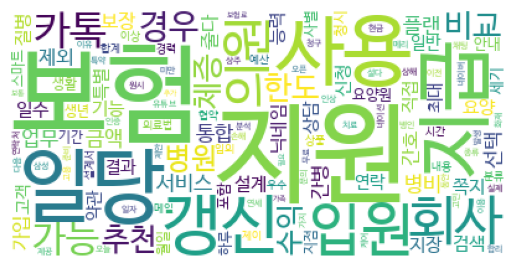

In [216]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

#### 빈도수만 고려한 워드클라우드

In [217]:
from collections import Counter
noun_count = Counter(morphs_nouns_list)
noun_count

Counter({'간병인': 9842,
         '보험': 5847,
         '병원': 3876,
         '원': 3593,
         '만': 3395,
         '비용': 2779,
         '간병': 2757,
         '일': 2734,
         '수': 2610,
         '것': 2374,
         '거': 2203,
         '분': 1989,
         '입원': 1732,
         '가입': 1550,
         '저': 1393,
         '환자': 1306,
         '감사': 1294,
         '요양': 1244,
         '게': 1209,
         '시간': 1188,
         '지원': 1174,
         '정도': 1165,
         '저희': 1164,
         '때': 1156,
         '병비': 1147,
         '수술': 1120,
         '가능': 1102,
         '일당': 1087,
         '년': 1038,
         '필요': 1021,
         '상품': 1014,
         '가족': 964,
         '하루': 957,
         '사용': 925,
         '경우': 903,
         '보장': 897,
         '보험료': 867,
         '간': 846,
         '중': 841,
         '생각': 840,
         '제': 828,
         '부담': 731,
         '재활': 710,
         '갱신': 706,
         '금액': 692,
         '엄마': 675,
         '시': 646,
         '후': 643,
         '보호자': 641,
  

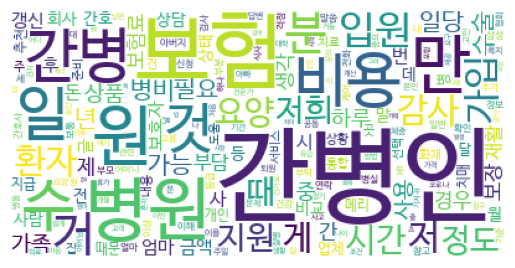

In [218]:
wordCloud.generate_from_frequencies(noun_count)
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()